<a href="https://colab.research.google.com/github/IanTirok/Hass-Consulting-Company-Predicting-House-Prices/blob/master/Moringa_Data_Science_Core_Module_2_W2_Independent_Project_2021_07_Ian_Tirok_Python_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question


> As a Data Scientist, I work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, I'll create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.




### b) Defining the Metric for Success

>To conduct the following and improve the performance of the models while using the metrics for performance as score, MSE and RMSE:

1. Multiple Linear Regression
2. Quantile Regression
3. Lasso Regression
4. Ridge Regression
5. Elastic Net Regression

### c) Understanding the context 


>There is continuous growth in demand for housing as the population increases. With this market growing, many real estate companies have been established, all bringing the housing commodity to the citizens. Housing prices are affected by many factors including, micro economic factors like customers, competitors,suppliers etc.and macro economic factors including demographic, technological, political forces etc. Housing affordability continues to be a key challenge in Kenya given the current high cost of funding and unavailability of financing, amid rising property prices. Keeping all this factors constant, this project will focus on predicting the price of houses given its physical features.

### d) Recording the Experimental Design


1. Read and explore the given dataset.
2. Define the appropriateness of the available data to answer the given question.
3. Find and deal with outliers, anomalies, and missing data within the dataset.
4. Perform univariate, bivariate and multivariate analysis recording your observations.
5. Performing regression analysis.
6. Incorporate categorical independent variables into your models.Check for multicollinearity

Provide a recommendation based on your analysis.
Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

### e) Data Relevance

## 2. Reading the Data

In [213]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.regression.quantile_regression as quant
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [214]:
# Loading the df ranking Dataset
url = '/content/drive/MyDrive/Core Module 2 wk 2/IP/Independent Project Week 7 - house_data.csv' 

df = pd.read_csv(url)
dfcopy = pd.read_csv(url)


## 3. Checking the Data

In [3]:
df.shape

(21613, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
df.head()

id     price  bedrooms  ...    long  sqft_living15  sqft_lot15
0  7129300520 221900.00         3  ... -122.26           1340        5650
1  6414100192 538000.00         3  ... -122.32           1690        7639
2  5631500400 180000.00         2  ... -122.23           2720        8062
3  2487200875 604000.00         4  ... -122.39           1360        5000
4  1954400510 510000.00         3  ... -122.05           1800        7503

[5 rows x 20 columns]

In [6]:
df.tail()

id     price  bedrooms  ...    long  sqft_living15  sqft_lot15
21608   263000018 360000.00         3  ... -122.35           1530        1509
21609  6600060120 400000.00         4  ... -122.36           1830        7200
21610  1523300141 402101.00         2  ... -122.30           1020        2007
21611   291310100 400000.00         3  ... -122.07           1410        1287
21612  1523300157 325000.00         2  ... -122.30           1020        1357

[5 rows x 20 columns]

In [7]:
df.sample()

id     price  bedrooms  ...    long  sqft_living15  sqft_lot15
4747  7254000100 680000.00         3  ... -122.17           2060        2936

[1 rows x 20 columns]

In [8]:
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## 5. Tidying the Dataset

###*df dataset*

In [215]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

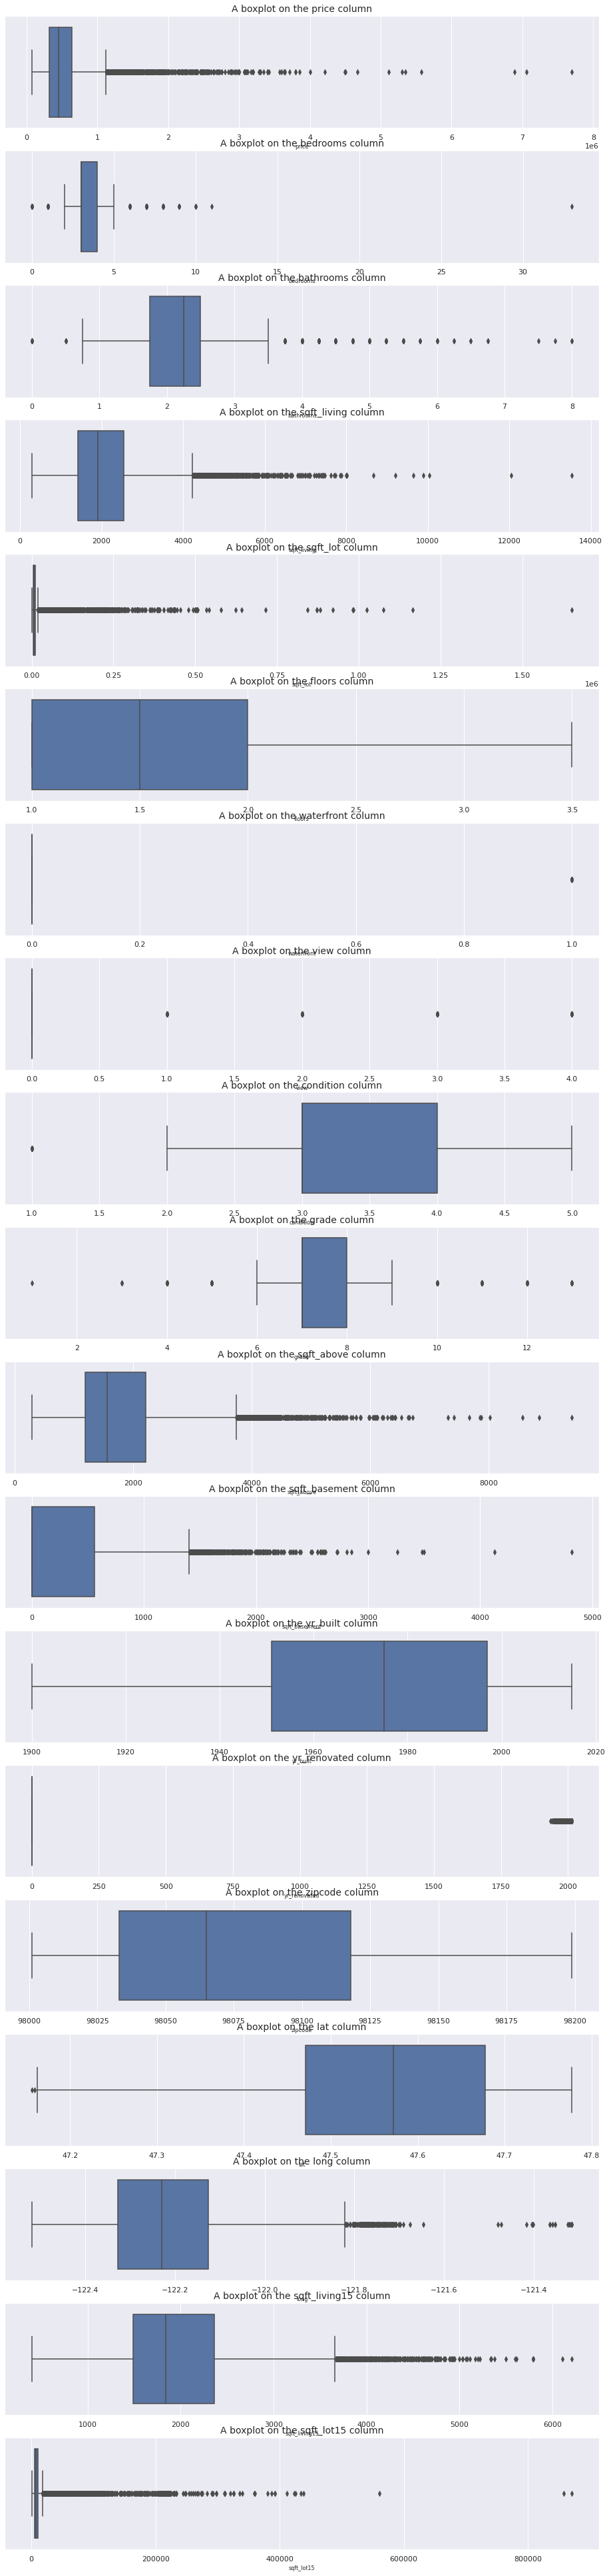

In [216]:
# Checking for Outliers


col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize = (16,70))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [217]:
#There seems to be very many outliers but lets count them to be sure

df1 = df[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


id                  0
price            1159
bedrooms          546
bathrooms         571
sqft_living       572
sqft_lot         2425
floors              0
waterfront        163
view             2124
condition          30
grade            1911
sqft_above        611
sqft_basement     496
yr_built            0
yr_renovated      914
zipcode             0
lat                 2
long              256
sqft_living15     544
sqft_lot15       2194
dtype: int64

There seems to be very many outliers, if we decide to drop them, the data may not be sufficient for the analysis

In [218]:
# Identifying the Missing Data
#
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [219]:
# Dealing with the Missing Data
#
# There are no missing values so we  can proceed

In [220]:
# Identifying the duplicate Data

len(df)-len(df.drop_duplicates())

3

In [221]:
# Dealing with the Duplicate Data
# They are few entries that are duplicates so we can procceed to drop them
df = df.drop_duplicates()

In [222]:
# More data cleaning procedures
#We found that we will not use the zipcode location. So we can drop it.

#df = df.drop(columns=['zipcode'])


#Encoding columns
# our dataset seems to be having numerical values only. we do not need to encode as of now


#we found that we had very many outliers so we will not be dropping them. - They will affect our analysis
#don't drop outliers

# We found that the year column has been recognized as an integer so we will change it to datetime datatype

# df['yr_built'] = pd.to_datetime(df['yr_built'])

# df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])

In [223]:
#Standardizing column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [224]:
df.shape

(21610, 20)

In [225]:
#Lets check the time period that the houses were built
x = df.yr_built.unique()
np.sort(x)

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

We can see that the houses werebuilt between 1900 and 2015

In [226]:
#Lets check the time period that the houses were renovated
x =df.yr_renovated.unique()
np.sort(x)

array([   0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

We can see that we have some houses that have never been renovated (0). The rest have been renovated between 1934 and 2015

## 6. Exploratory Analysis

###Measures of central tendancy


In [21]:
#getting summary
df.describe(include='all')

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
count      21610.00   21610.00  21610.00  ... 21610.00       21610.00    21610.00
mean  4580160795.99  540178.94      3.37  ...  -122.21        1986.52    12769.03
std   2876547019.99  367387.59      0.93  ...     0.14         685.43    27305.97
min      1000102.00   75000.00      0.00  ...  -122.52         399.00      651.00
25%   2123049250.50  321612.50      3.00  ...  -122.33        1490.00     5100.00
50%   3904930325.00  450000.00      3.00  ...  -122.23        1840.00     7620.00
75%   7308900358.75  645000.00      4.00  ...  -122.12        2360.00    10083.00
max   9900000190.00 7700000.00     33.00  ...  -121.31        6210.00   871200.00

[8 rows x 20 columns]

In [22]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
# Mode
# Calculating mode across different columns

a = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].mode().head(1)

arr = a.to_numpy()
arr


array([[ 3.50000e+05,  3.00000e+00,  2.50000e+00,  1.30000e+03,
         5.00000e+03,  1.00000e+00,  0.00000e+00,  0.00000e+00,
         3.00000e+00,  7.00000e+00,  1.30000e+03,  0.00000e+00,
         2.01400e+03,  0.00000e+00,  9.81030e+04,  4.75322e+01,
        -1.22290e+02,  1.54000e+03,  5.00000e+03]])

In [24]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], 
       'The most appearing record': [3.50000e+05,  3.00000e+00,  2.50000e+00,  1.30000e+03,
         5.00000e+03,  1.00000e+00,  0.00000e+00,  0.00000e+00,
         3.00000e+00,  7.00000e+00,  1.30000e+03,  0.00000e+00,
         2.01400e+03,  0.00000e+00,  9.81030e+04,  4.75322e+01,
        -1.22290e+02,  1.54000e+03,  5.00000e+03]} 
modedf =pd.DataFrame(data)
modedf

Criteria  The most appearing record
0           price                  350000.00
1        bedrooms                       3.00
2       bathrooms                       2.50
3     sqft_living                    1300.00
4        sqft_lot                    5000.00
5          floors                       1.00
6      waterfront                       0.00
7            view                       0.00
8       condition                       3.00
9           grade                       7.00
10     sqft_above                    1300.00
11  sqft_basement                       0.00
12       yr_built                    2014.00
13   yr_renovated                       0.00
14        zipcode                   98103.00
15            lat                      47.53
16           long                    -122.29
17  sqft_living15                    1540.00
18     sqft_lot15                    5000.00

In [25]:
# Mean

# Calculating mean across different columns

a = df.mean()

a
a
b = pd.DataFrame(a)
b

0
id            4580160795.99
price             540178.94
bedrooms               3.37
bathrooms              2.11
sqft_living         2079.88
sqft_lot           15108.29
floors                 1.49
waterfront             0.01
view                   0.23
condition              3.41
grade                  7.66
sqft_above          1788.35
sqft_basement        291.53
yr_built            1971.00
yr_renovated          84.32
zipcode            98077.95
lat                   47.56
long                -122.21
sqft_living15       1986.52
sqft_lot15         12769.03

In [26]:
# Median
# Calculating the median for across different columns

a = df.median()

a
b = pd.DataFrame(a)
b

0
id            3904930325.00
price             450000.00
bedrooms               3.00
bathrooms              2.25
sqft_living         1910.00
sqft_lot            7619.00
floors                 1.50
waterfront             0.00
view                   0.00
condition              3.00
grade                  7.00
sqft_above          1560.00
sqft_basement          0.00
yr_built            1975.00
yr_renovated           0.00
zipcode            98065.00
lat                   47.57
long                -122.23
sqft_living15       1840.00
sqft_lot15          7620.00

### Measures of Dispersion

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

In [28]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
#Range for the respective columns
x = {}
col = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for col in col:
    x[col] = df[col].max()- df[col].min()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], 
       'The range is': [ 7.625000e+06, 3.300000e+01, 8.000000e+00, 1.325000e+04,
       1.650839e+06, 2.500000e+00, 1.000000e+00, 4.000000e+00,
       4.000000e+00, 1.200000e+01, 9.120000e+03, 4.820000e+03,
       1.150000e+02, 2.015000e+03, 1.980000e+02, 6.217000e-01,
       1.204000e+00, 5.811000e+03, 8.705490e+05]} 
modedf =pd.DataFrame(data)
modedf

Criteria  The range is
0           price    7625000.00
1        bedrooms         33.00
2       bathrooms          8.00
3     sqft_living      13250.00
4        sqft_lot    1650839.00
5          floors          2.50
6      waterfront          1.00
7            view          4.00
8       condition          4.00
9           grade         12.00
10     sqft_above       9120.00
11  sqft_basement       4820.00
12       yr_built        115.00
13   yr_renovated       2015.00
14        zipcode        198.00
15            lat          0.62
16           long          1.20
17  sqft_living15       5811.00
18     sqft_lot15     870549.00

In [30]:
# Standard Deviation
# We will now calculate the standard deviation to check the spread of our data from the mean

x = {}
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for col in col:
    x[col] = df[col].std()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], 
        'The standard deviation is': [3.67387585e+05, 9.30109700e-01, 7.70203702e-01, 9.18500299e+02,
       4.14232267e+04, 5.39993501e-01, 8.65231575e-02, 7.66136460e-01,
       6.50763895e-01, 1.17550020e+00, 8.28138723e+02, 4.42596699e+02,
       2.93726386e+01, 4.01499264e+02, 5.35053730e+01, 1.38571936e-01,
       1.40832823e-01, 6.85425781e+02, 2.73059725e+04]} 
std =pd.DataFrame(data)
std





Criteria  The standard deviation is
0           price                  367387.59
1        bedrooms                       0.93
2       bathrooms                       0.77
3     sqft_living                     918.50
4        sqft_lot                   41423.23
5          floors                       0.54
6      waterfront                       0.09
7            view                       0.77
8       condition                       0.65
9           grade                       1.18
10     sqft_above                     828.14
11  sqft_basement                     442.60
12       yr_built                      29.37
13   yr_renovated                     401.50
14        zipcode                      53.51
15            lat                       0.14
16           long                       0.14
17  sqft_living15                     685.43
18     sqft_lot15                   27305.97

In [31]:
#Variance
# We will now calculate the Variance to check the spread of our data from the mean
#
#
x = {}
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for col in col:
    x[col] = df[col].var()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], 
         'The variance is': [1.34973638e+11, 8.65104054e-01, 5.93213743e-01, 8.43642799e+05,
       1.71588371e+09, 2.91592981e-01, 7.48625679e-03, 5.86965076e-01,
       4.23493647e-01, 1.38180072e+00, 6.85813745e+05, 1.95891838e+05,
       8.62751896e+02, 1.61201659e+05, 2.86282494e+03, 1.92021814e-02,
       1.98338841e-02, 4.69808501e+05, 7.45616132e+08]} 
var =pd.DataFrame(data)
var


Criteria  The variance is
0           price  134973638000.00
1        bedrooms             0.87
2       bathrooms             0.59
3     sqft_living        843642.80
4        sqft_lot    1715883710.00
5          floors             0.29
6      waterfront             0.01
7            view             0.59
8       condition             0.42
9           grade             1.38
10     sqft_above        685813.74
11  sqft_basement        195891.84
12       yr_built           862.75
13   yr_renovated        161201.66
14        zipcode          2862.82
15            lat             0.02
16           long             0.02
17  sqft_living15        469808.50
18     sqft_lot15     745616132.00

In [32]:
#Kurtosis
# We will now calculate the Kurtosis to check the spread of our data

x = {}
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for col in col:
    x[col] = df[col].kurt()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], 
         'The kurtosis is': [34.51743773,  49.06010825,   1.27963716,   5.24222291,
       285.04062149,  -0.48424572, 127.6140896 ,  10.9021183 ,
         0.52568829,   1.19108983,   3.40200833,   2.7148855 ,
        -0.65720675,  18.72373285,  -0.85360379,  -0.67660121,
         1.04982862,   1.59700897, 150.7432752]} 
kurt =pd.DataFrame(data)
kurt


Criteria  The kurtosis is
0           price            34.52
1        bedrooms            49.06
2       bathrooms             1.28
3     sqft_living             5.24
4        sqft_lot           285.04
5          floors            -0.48
6      waterfront           127.61
7            view            10.90
8       condition             0.53
9           grade             1.19
10     sqft_above             3.40
11  sqft_basement             2.71
12       yr_built            -0.66
13   yr_renovated            18.72
14        zipcode            -0.85
15            lat            -0.68
16           long             1.05
17  sqft_living15             1.60
18     sqft_lot15           150.74

In [33]:
# #Skewness
# # We will now calculate the Skewness to check the spread of our data

x = {}
col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for col in col:
    x[col] = df[col].skew()
z = pd.Series(x)
z = z.to_numpy()
z

data = {'Criteria': ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], 
         'The Skew is': [4.02146745,  1.97424355,  0.51116428,  1.47153218, 13.05917006,
        0.61652253, 11.38429967,  3.39687188,  1.03278852,  0.77129704,
        1.44675794,  1.5778143 , -0.4698229 ,  4.55197398,  0.40553302,
       -0.48518539,  0.88531242,  1.10829018,  9.50612948]}
 
skew =pd.DataFrame(data)
skew


Criteria  The Skew is
0           price         4.02
1        bedrooms         1.97
2       bathrooms         0.51
3     sqft_living         1.47
4        sqft_lot        13.06
5          floors         0.62
6      waterfront        11.38
7            view         3.40
8       condition         1.03
9           grade         0.77
10     sqft_above         1.45
11  sqft_basement         1.58
12       yr_built        -0.47
13   yr_renovated         4.55
14        zipcode         0.41
15            lat        -0.49
16           long         0.89
17  sqft_living15         1.11
18     sqft_lot15         9.51

In [34]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

###Visualisation

###Univariate

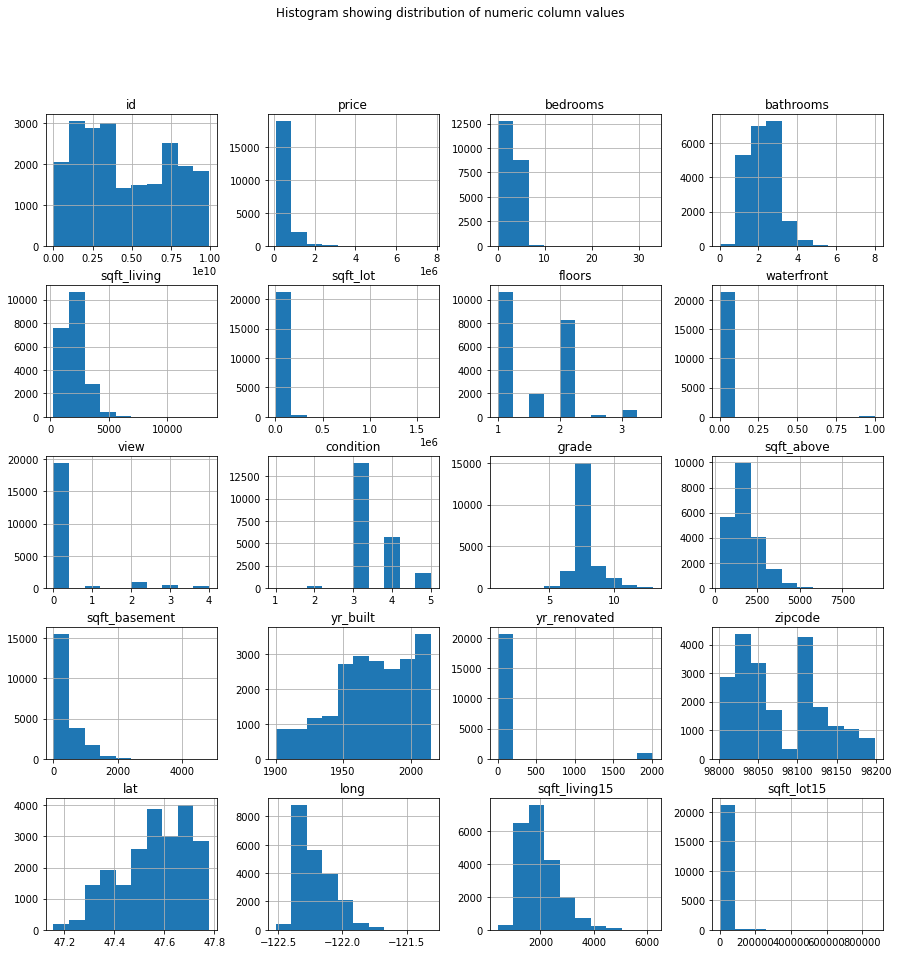

In [35]:

df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of numeric column values")
plt.savefig('Histogram')
plt.show()

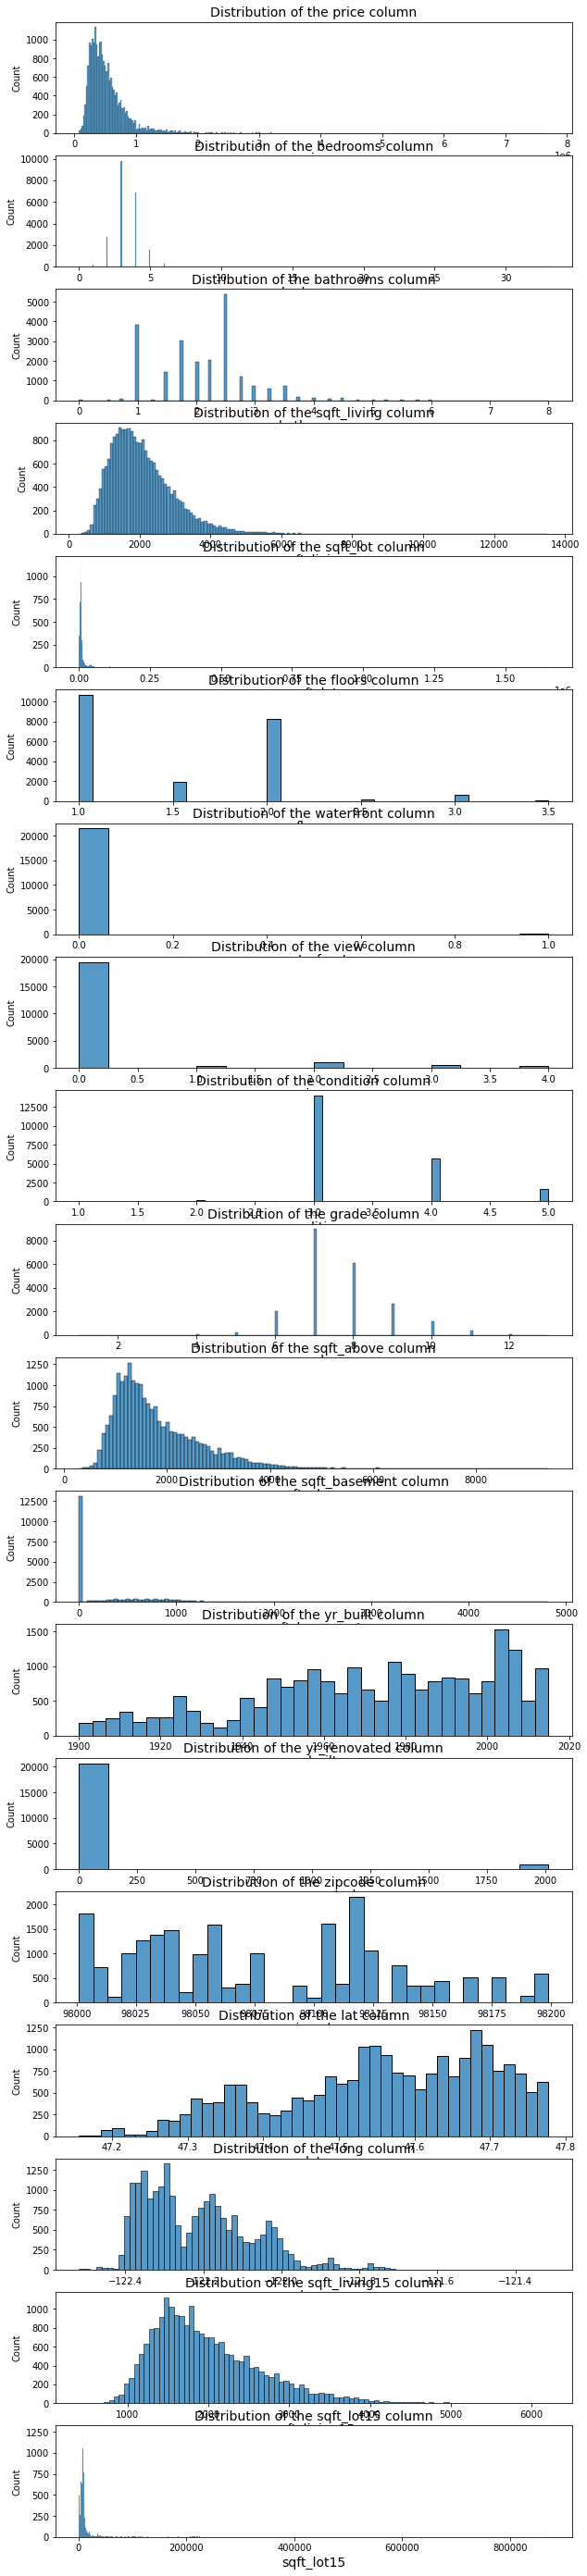

In [36]:

col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize = (10,50))
for i, col_val in enumerate(col_names):

    sns.histplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
plt.show()

In [37]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

<function matplotlib.pyplot.show>

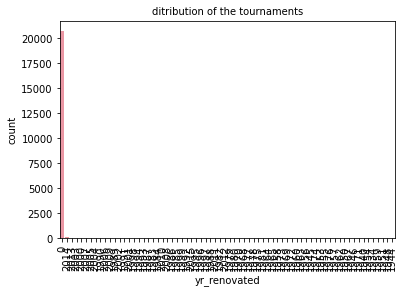

In [39]:
#Comparrison of ditribution of the tournaments
g = sns.countplot(x='yr_renovated', data=df, order = df['yr_renovated'].value_counts().index)
sns.set(rc={'figure.figsize':(20,55)})
plt.title('ditribution of the tournaments', fontsize = 10)
# plt.figure(figsize=(20,50))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show

This shows us that majority of the houses have not been renovated


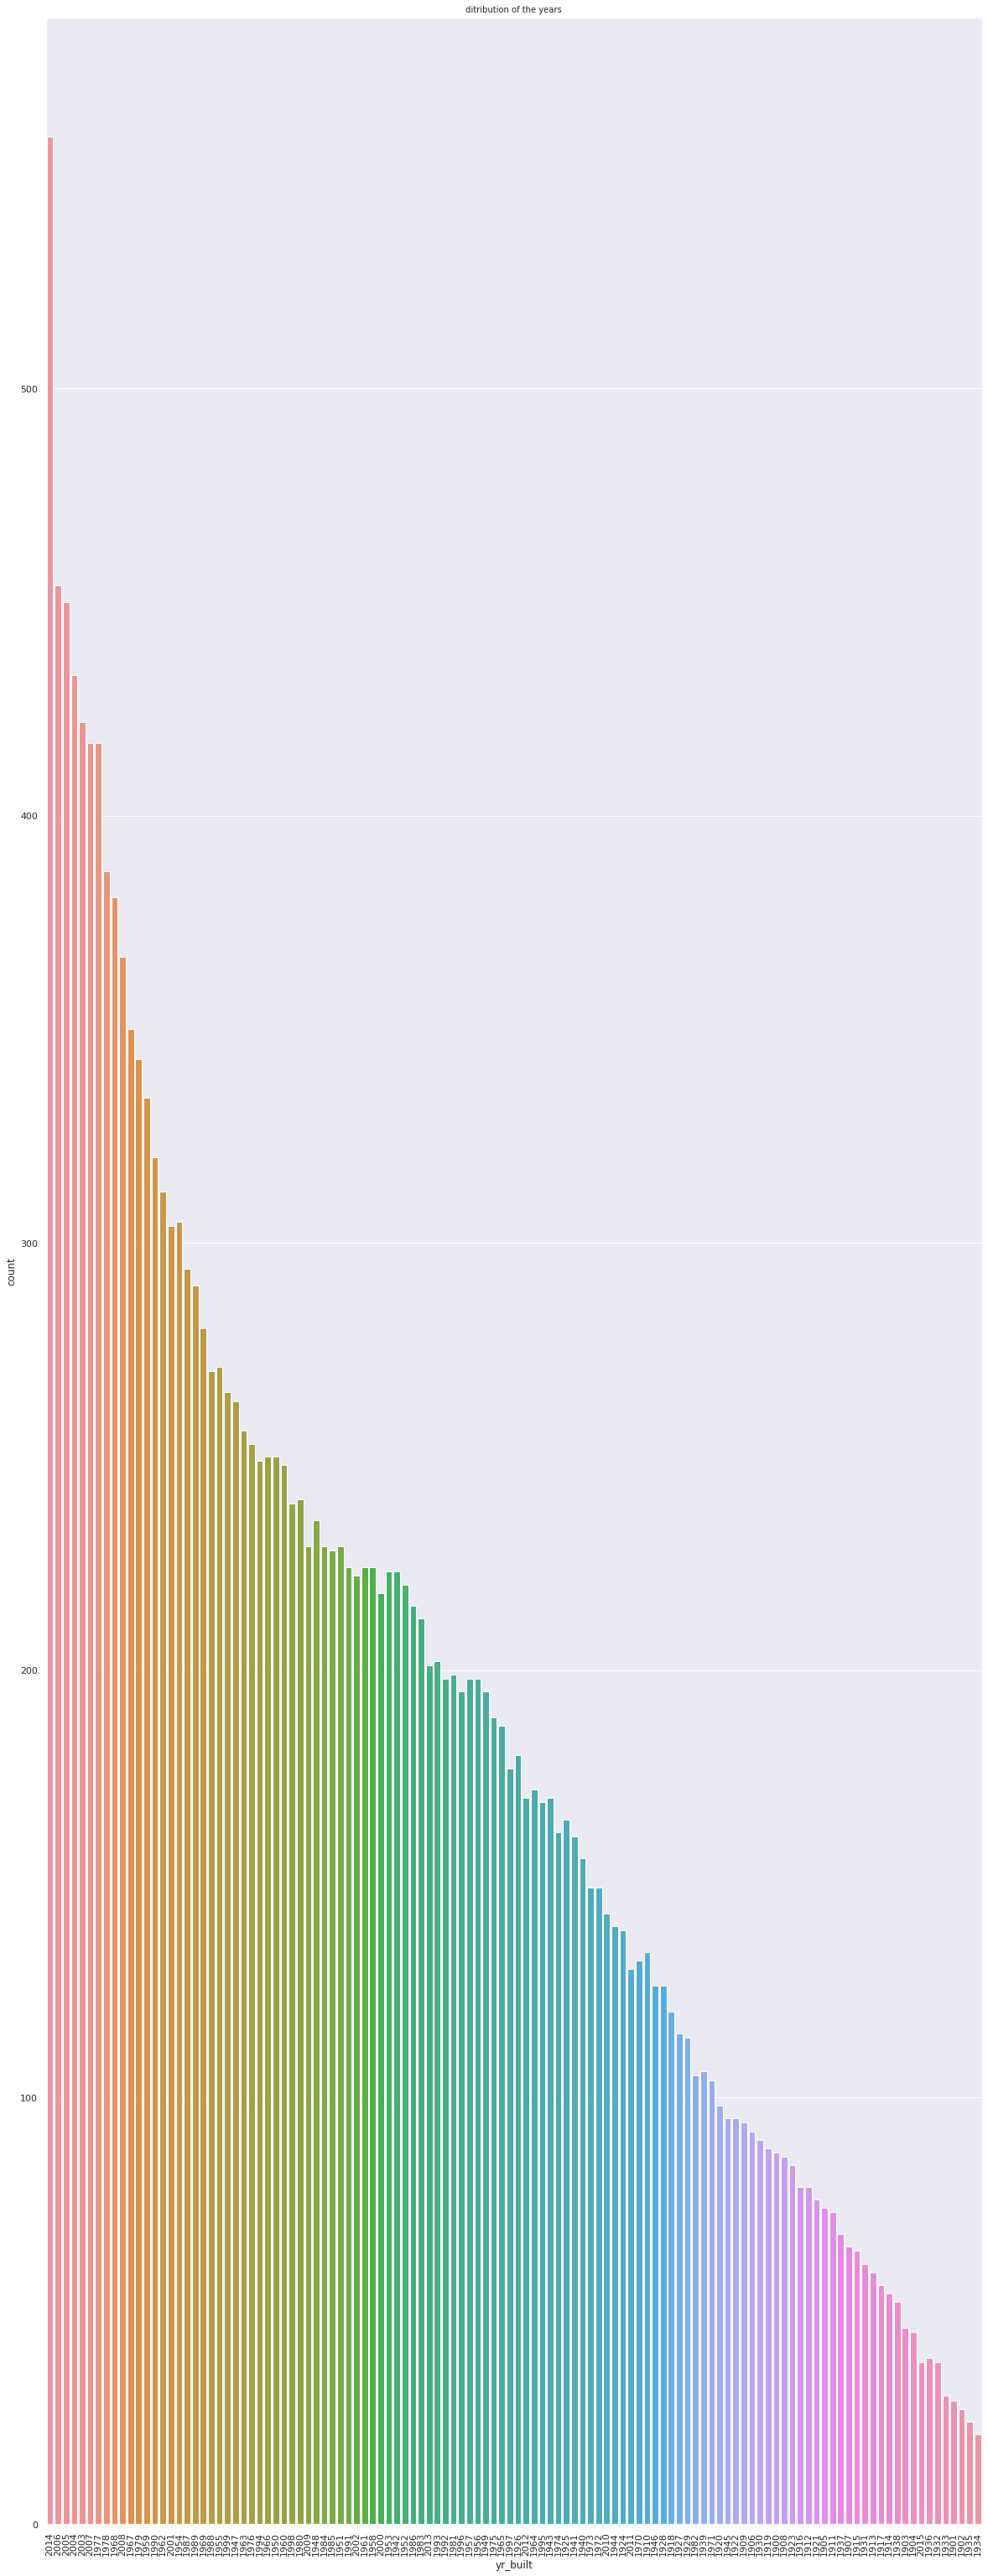

In [40]:
#Comparrison of ditribution of the years
y=sns.countplot(x='yr_built',data=df, order = df.groupby('yr_built')['yr_built'].agg('sum').sort_values(ascending=False).index)
#order=df.groupby('Genre')['Rating'].agg('mean').sort_values(ascending=False).index)
sns.set(rc={'figure.figsize':(20,10)})
plt.title('ditribution of the years', fontsize = 10)
y.set_xticklabels(y.get_xticklabels(),rotation=90)
plt.show()

Majority of the houses were constructed in 2014. The least houses were consutructed in the year 1934.

###Bivariate

Lets find out whether there is an effect of the independent variables on price

Our independent variables are;
 

1.  'bedrooms',
2. 'bathrooms', 
3. 'sqft_living', 
4. 'sqft_lot',
5. 'floors', 
6. 'waterfront',
7. 'view',
8. 'condition', 
9.  'grade', 
10.  'sqft_above',
11. 'sqft_basement', 
12. 'yr_built', 
13. 'yr_renovated', 
14. 'zipcode',
15. 'sqft_living15', 
16. 'sqft_lot15'



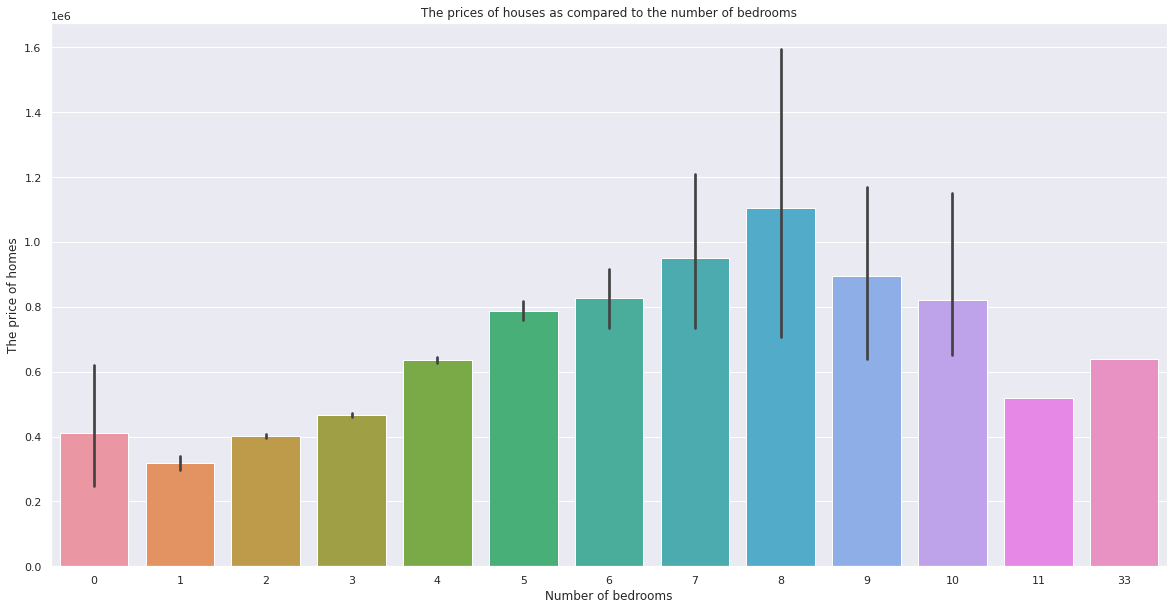

In [41]:
#Creating the dataframe with the sum of prices.
df_2 = df.groupby('price').sum()
df_2 = df_2.reset_index(inplace=True)
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['bedrooms'], y = df['price'], data=df_2)
plt.xlabel('Number of bedrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bedrooms')
plt.show()

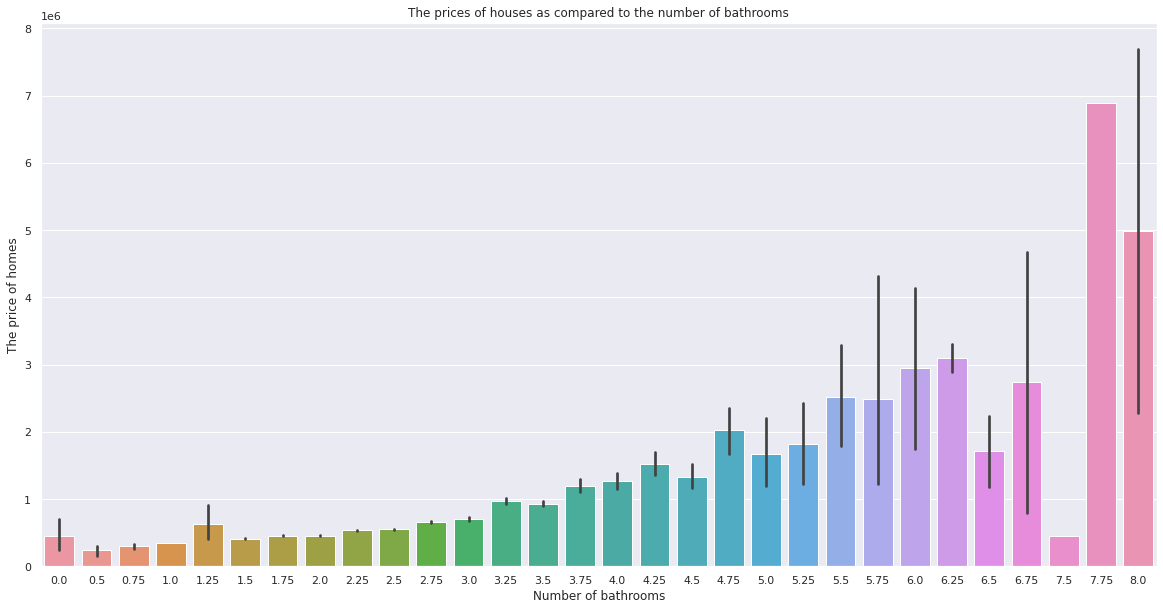

In [42]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['bathrooms'], y = df['price'], data=df_2)
plt.xlabel('Number of bathrooms')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of bathrooms')
plt.show()

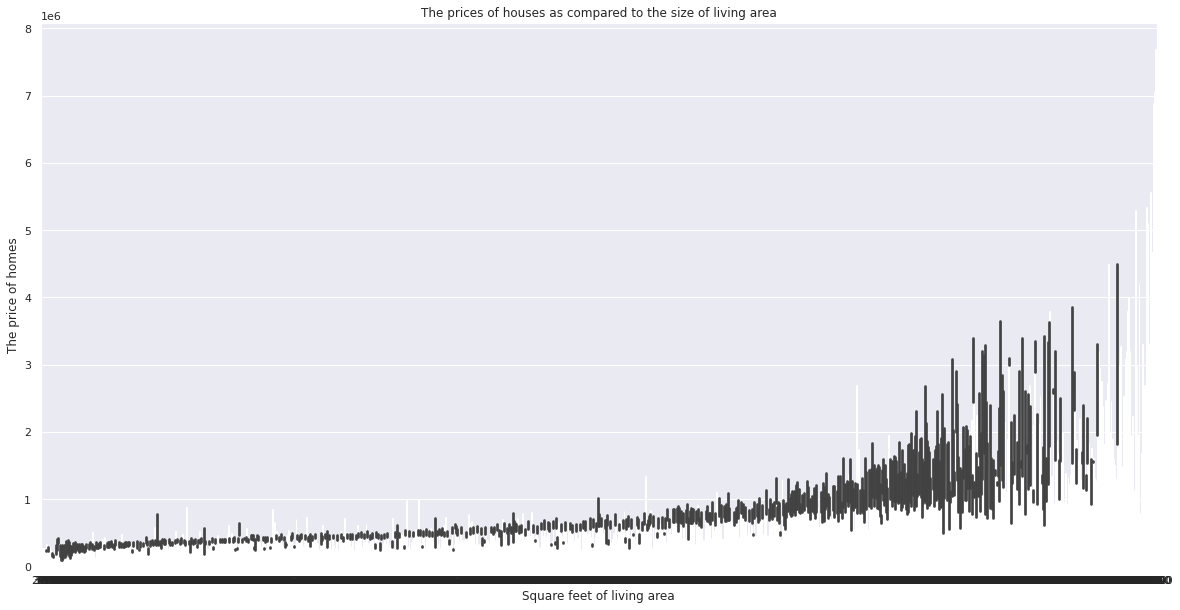

In [43]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['sqft_living'], y = df['price'], data=df_2)
plt.xlabel('Square feet of living area')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the size of living area')
plt.show()

In [44]:
'sqft_living15',
'sqft_lot15'

'sqft_lot15'

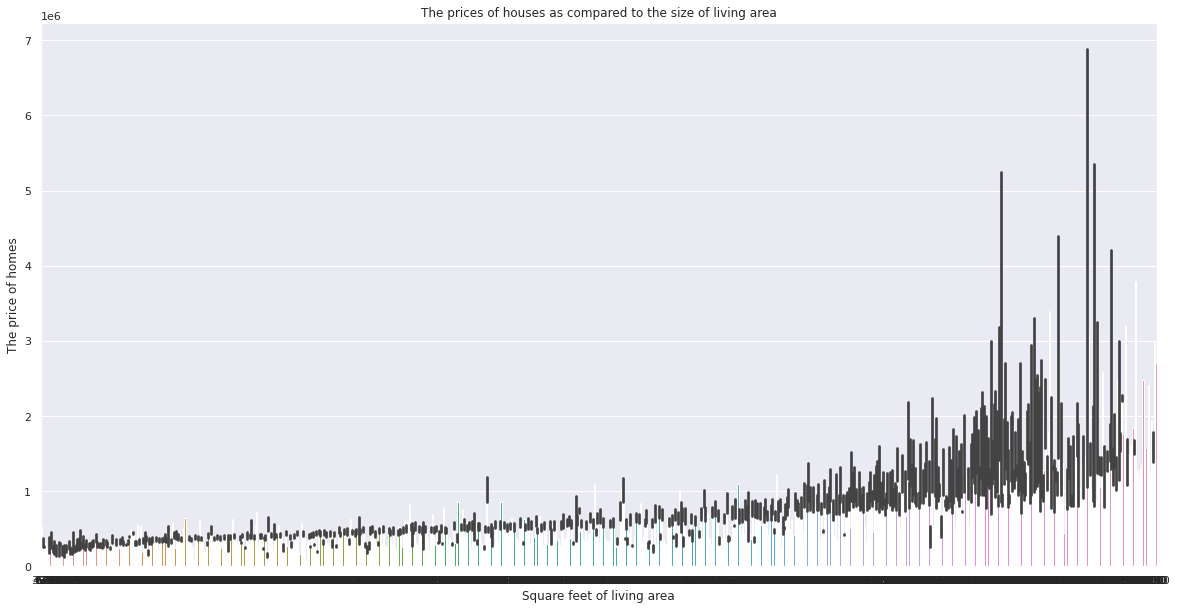

In [45]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['sqft_living15'], y = df['price'], data=df_2)
plt.xlabel('Square feet of living area')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the size of living area')
plt.show()

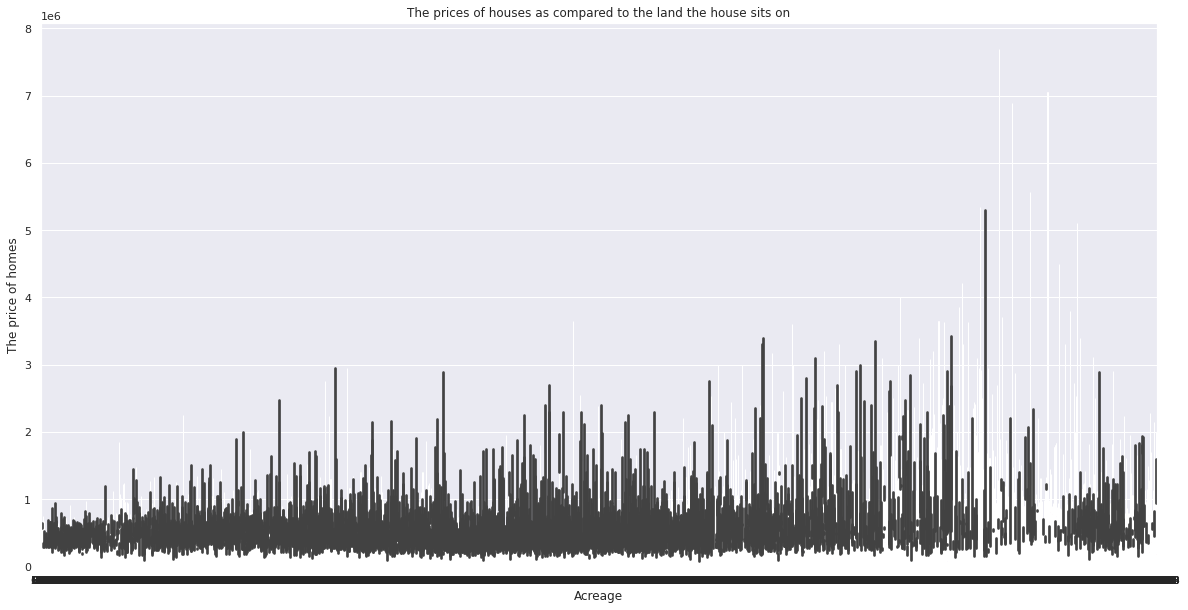

In [46]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['sqft_lot'], y = df['price'], data=df_2)
plt.xlabel('Acreage')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the land the house sits on')
plt.show()

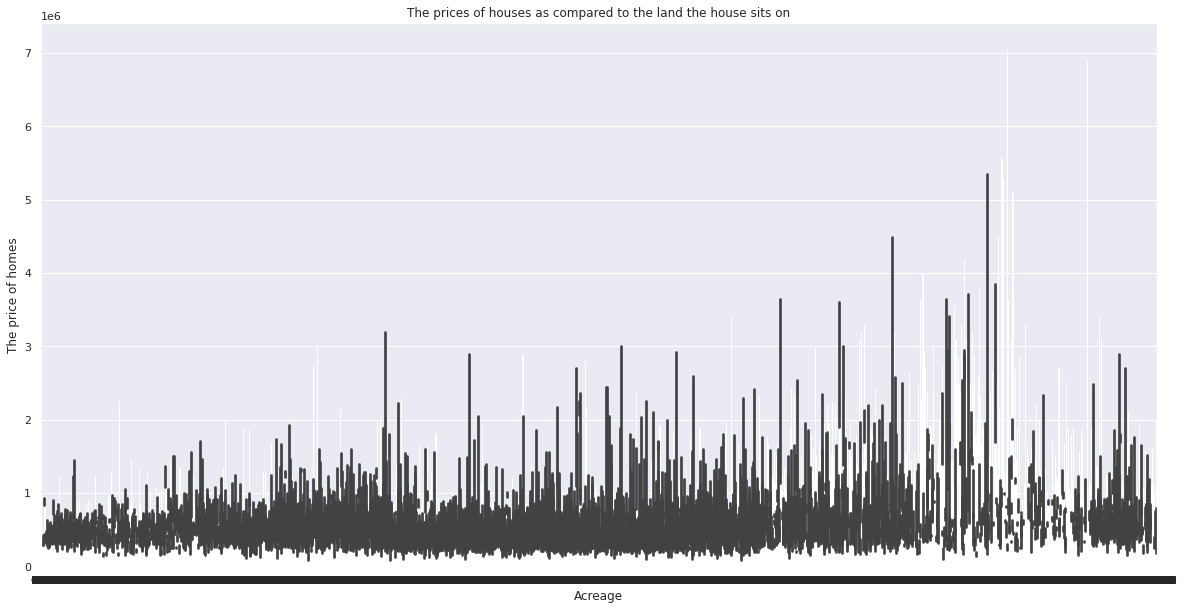

In [47]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['sqft_lot15'], y = df['price'], data=df_2)
plt.xlabel('Acreage')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the land the house sits on')
plt.show()

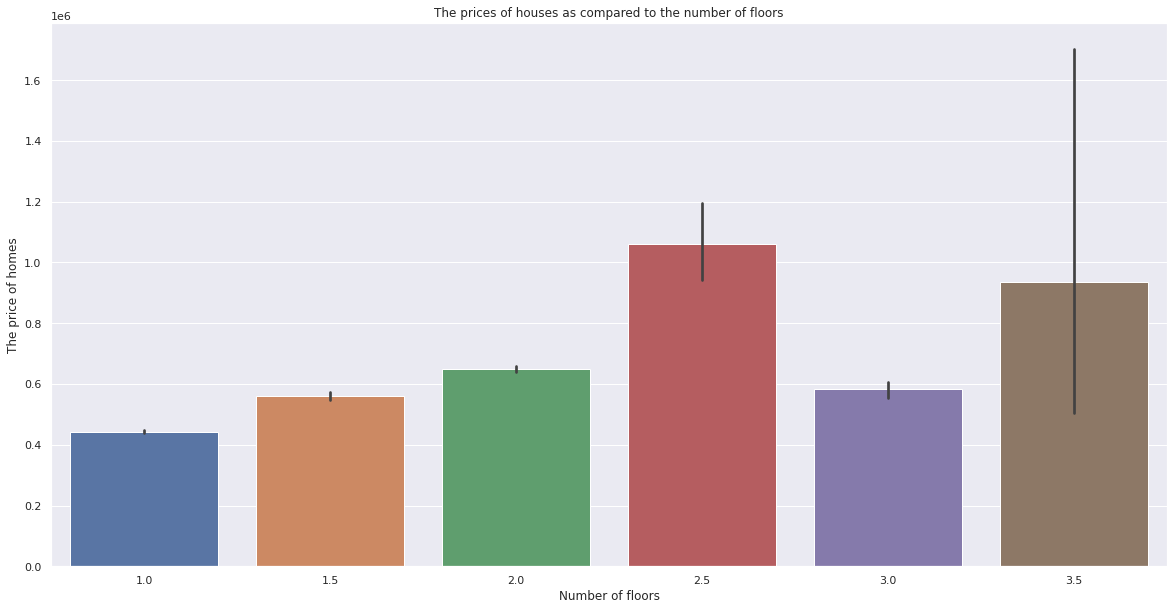

In [48]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['floors'], y = df['price'], data=df_2)
plt.xlabel('Number of floors')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the number of floors')
plt.show()

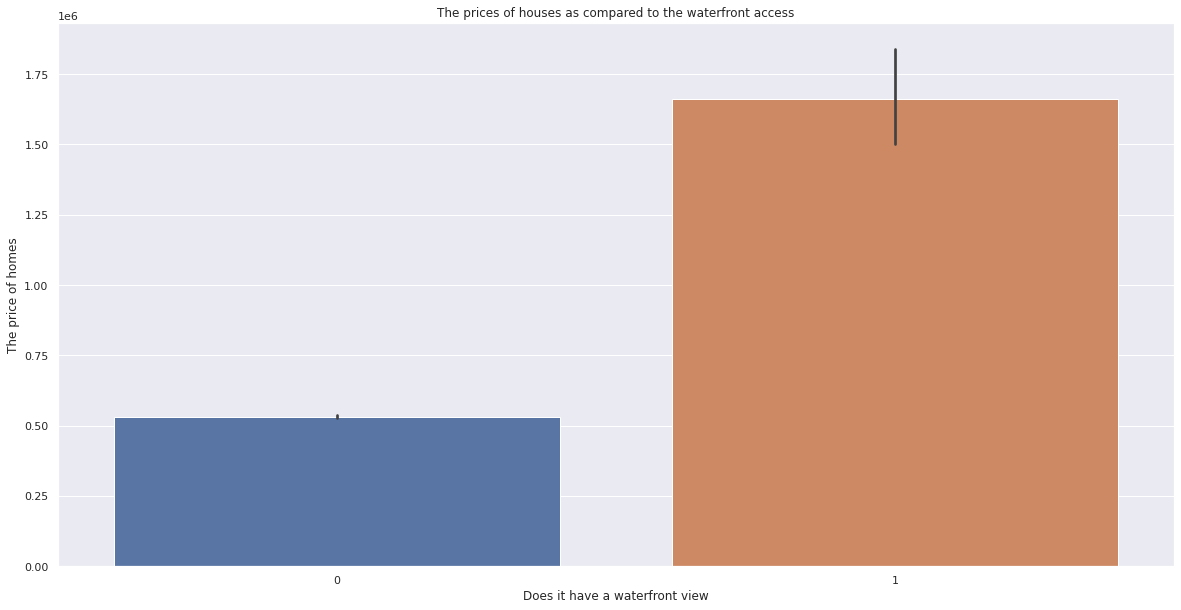

In [49]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['waterfront'], y = df['price'], data=df_2)
plt.xlabel('Does it have a waterfront view')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the waterfront access')
plt.show()

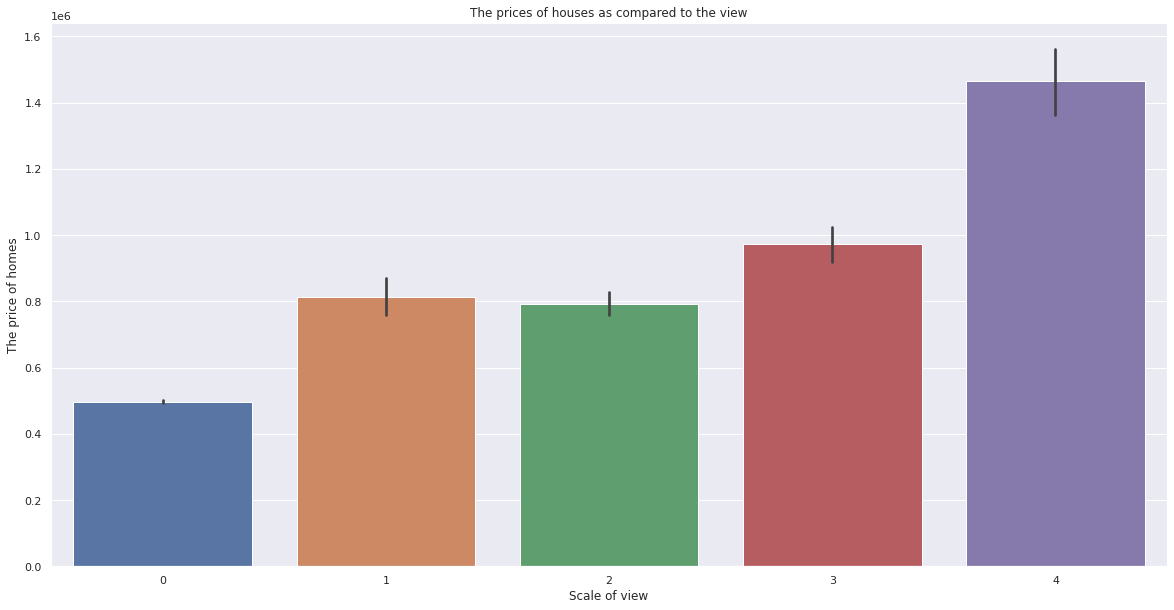

In [50]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['view'], y = df['price'], data=df_2)
plt.xlabel('Scale of view')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the view')
plt.show()

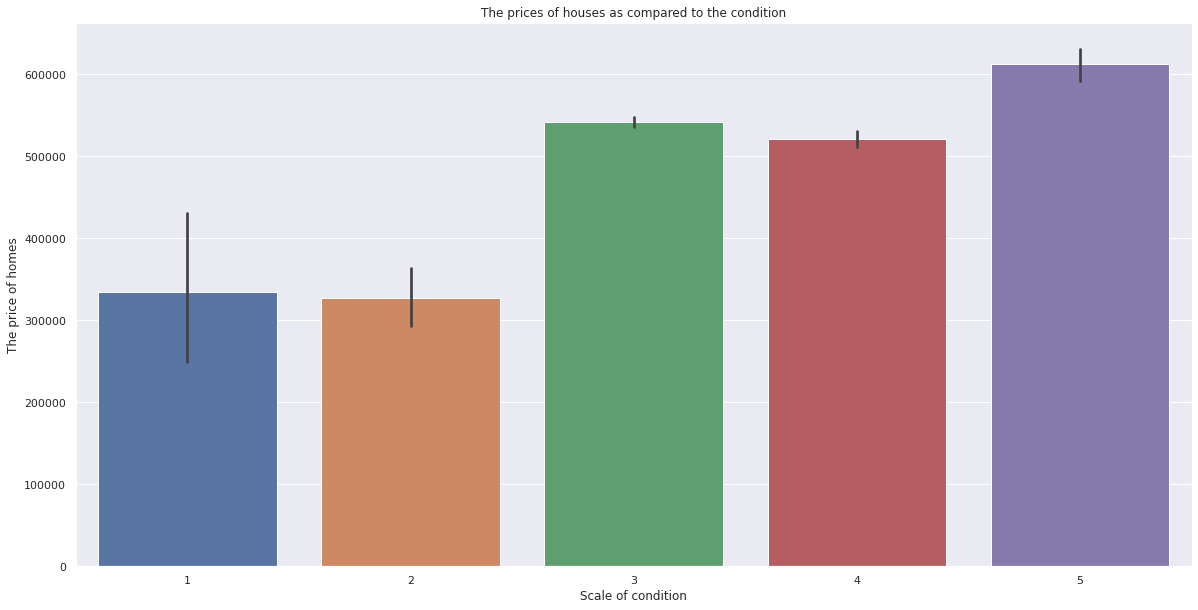

In [51]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['condition'], y = df['price'], data=df_2)
plt.xlabel('Scale of condition')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the condition')
plt.show()

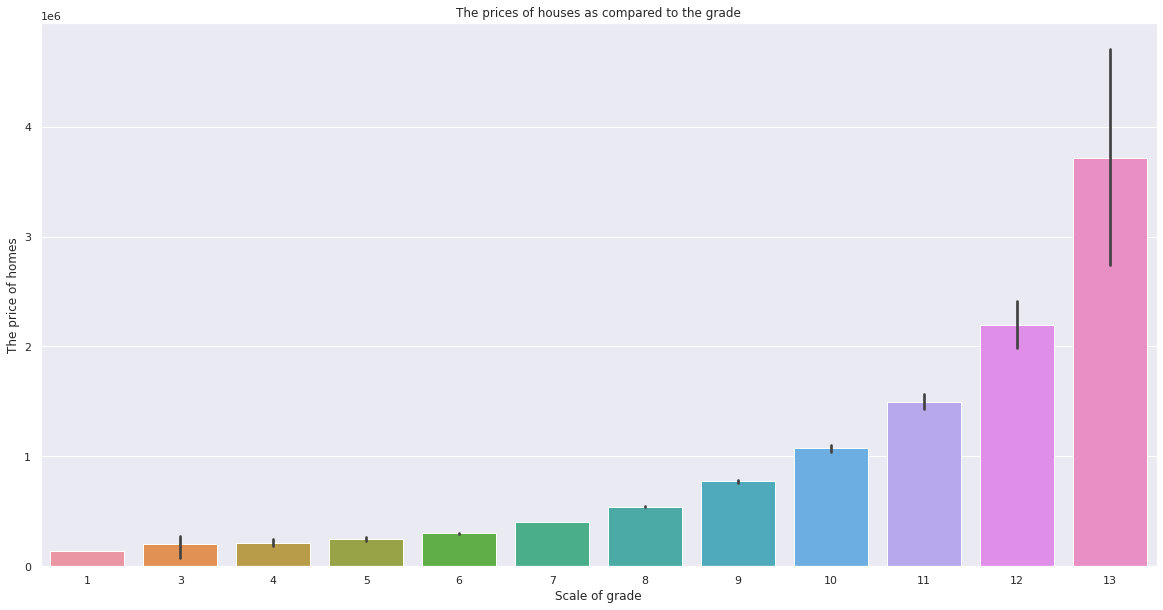

In [52]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['grade'], y = df['price'], data=df_2)
plt.xlabel('Scale of grade')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the grade')
plt.show()

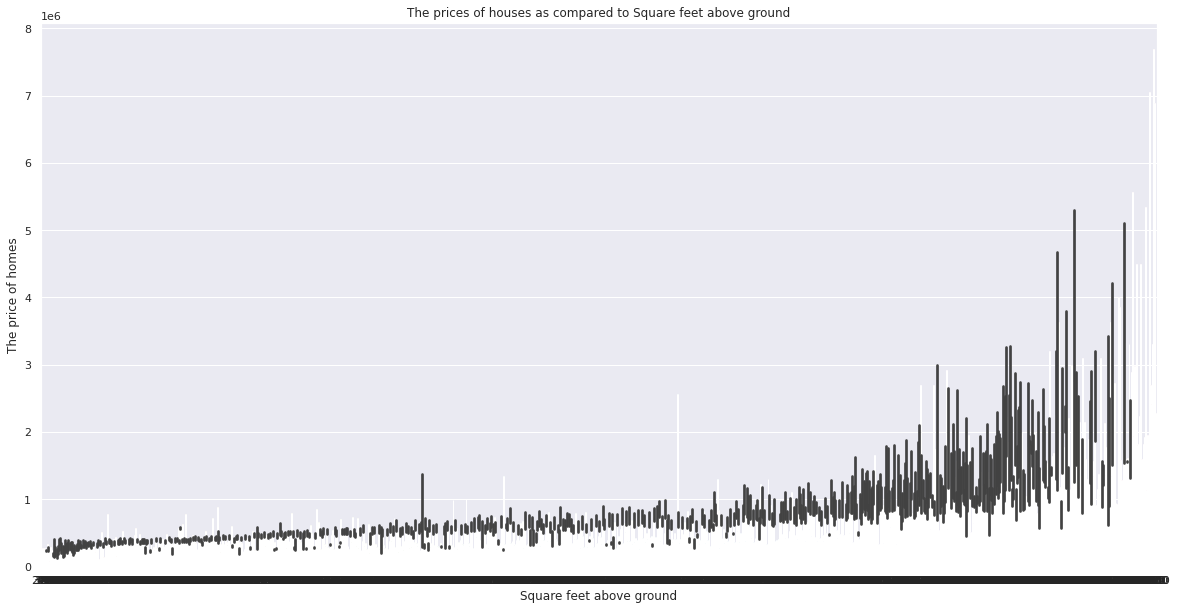

In [53]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['sqft_above'], y = df['price'], data=df_2)
plt.xlabel('Square feet above ground')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to Square feet above ground')
plt.show()

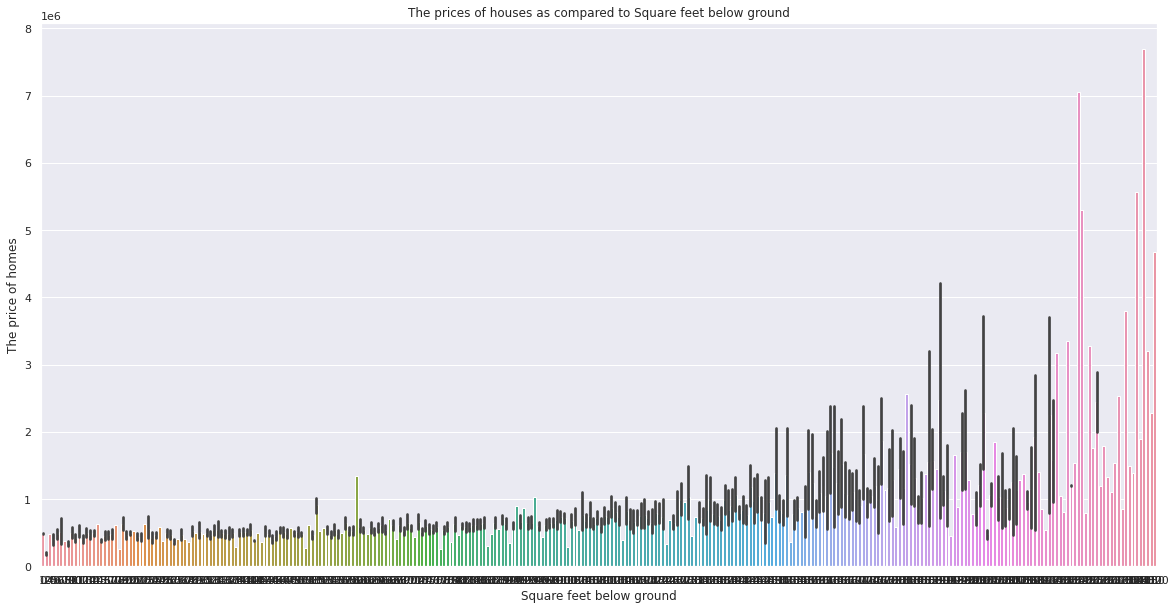

In [54]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['sqft_basement'], y = df['price'], data=df_2)
plt.xlabel('Square feet below ground')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to Square feet below ground')
plt.show()

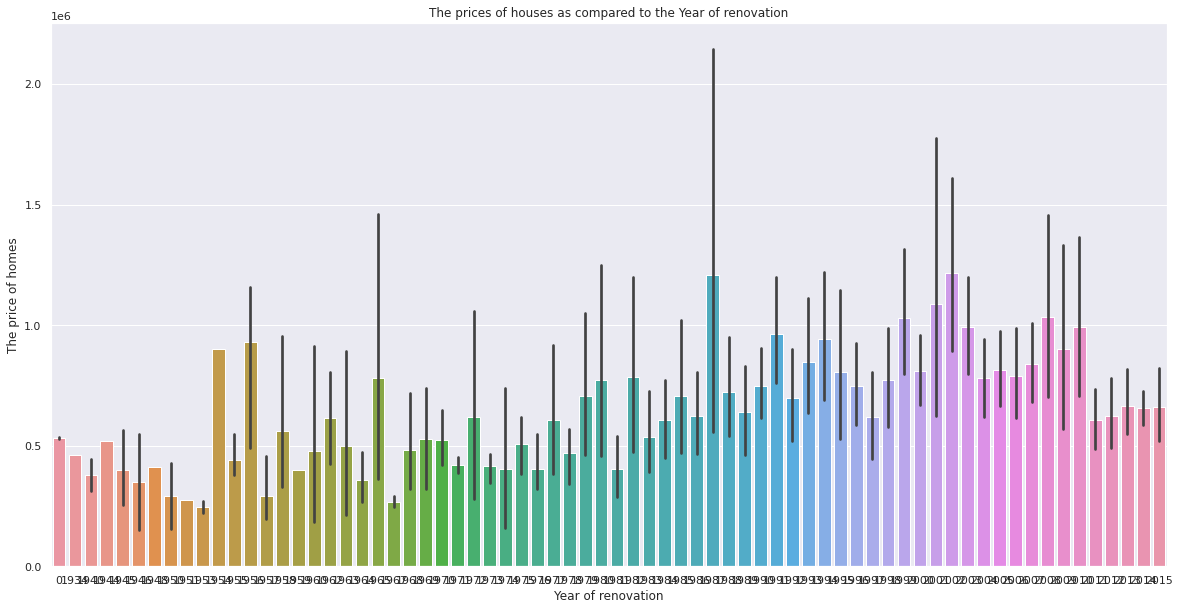

In [55]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['yr_renovated'], y = df['price'], data=df_2)
plt.xlabel('Year of renovation')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the Year of renovation')
plt.show()

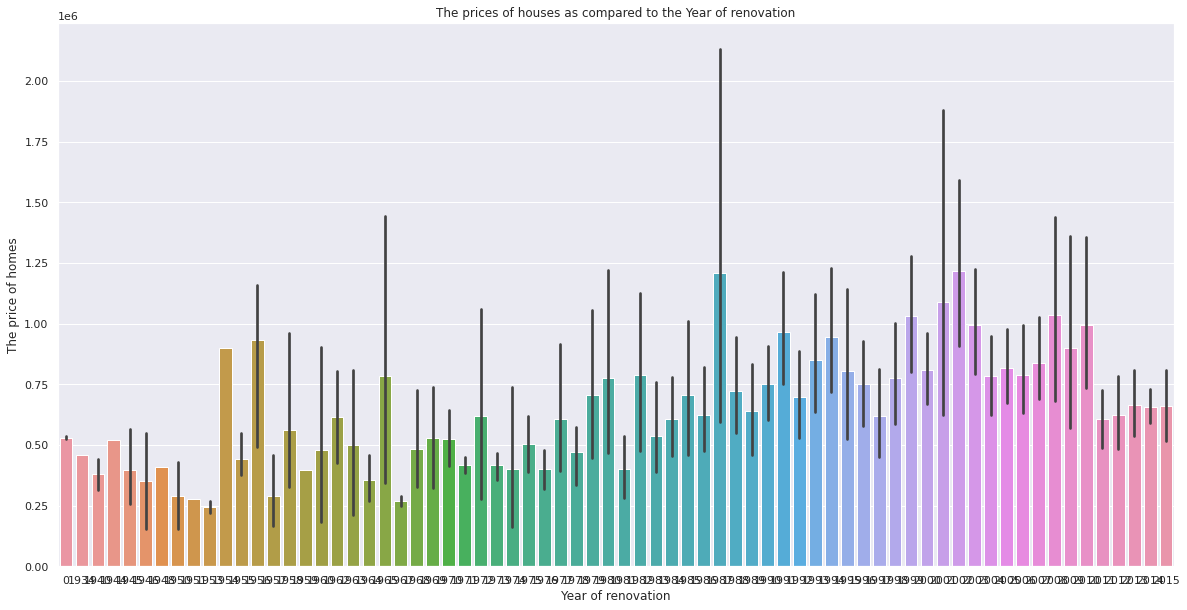

In [56]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['yr_renovated'], y = df['price'], data=df_2)
plt.xlabel('Year of renovation')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the Year of renovation')
plt.show()

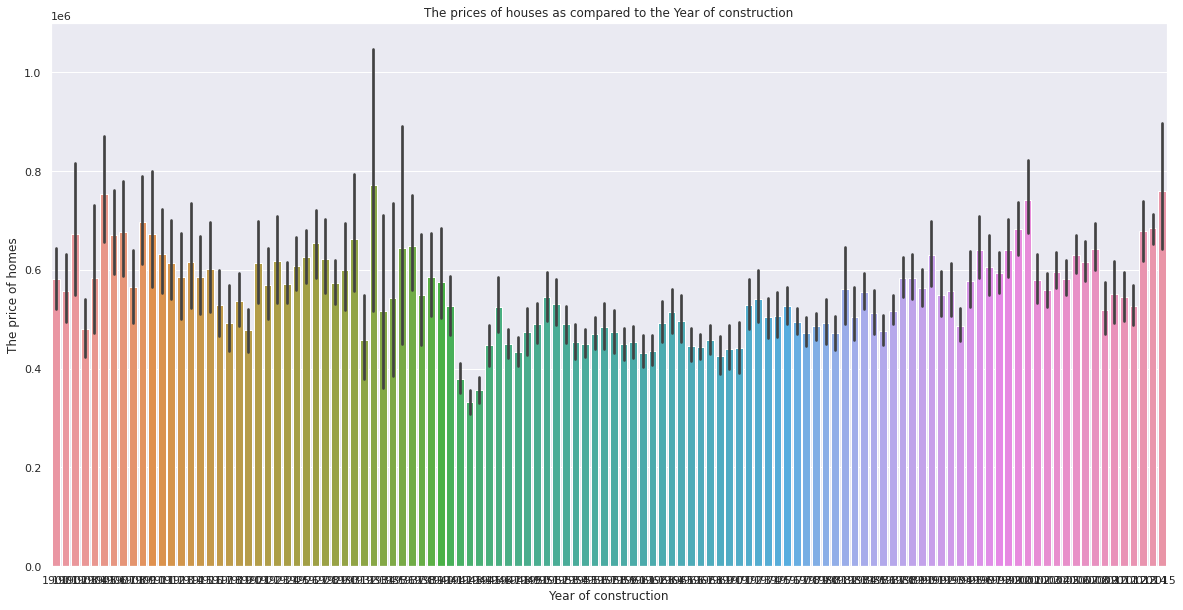

In [57]:
#Plotting the graphs using the seaborn barplot
sns.barplot(x = df['yr_built'], y = df['price'], data=df_2)
plt.xlabel('Year of construction')
plt.ylabel('The price of homes')
plt.title('The prices of houses as compared to the Year of construction')
plt.show()

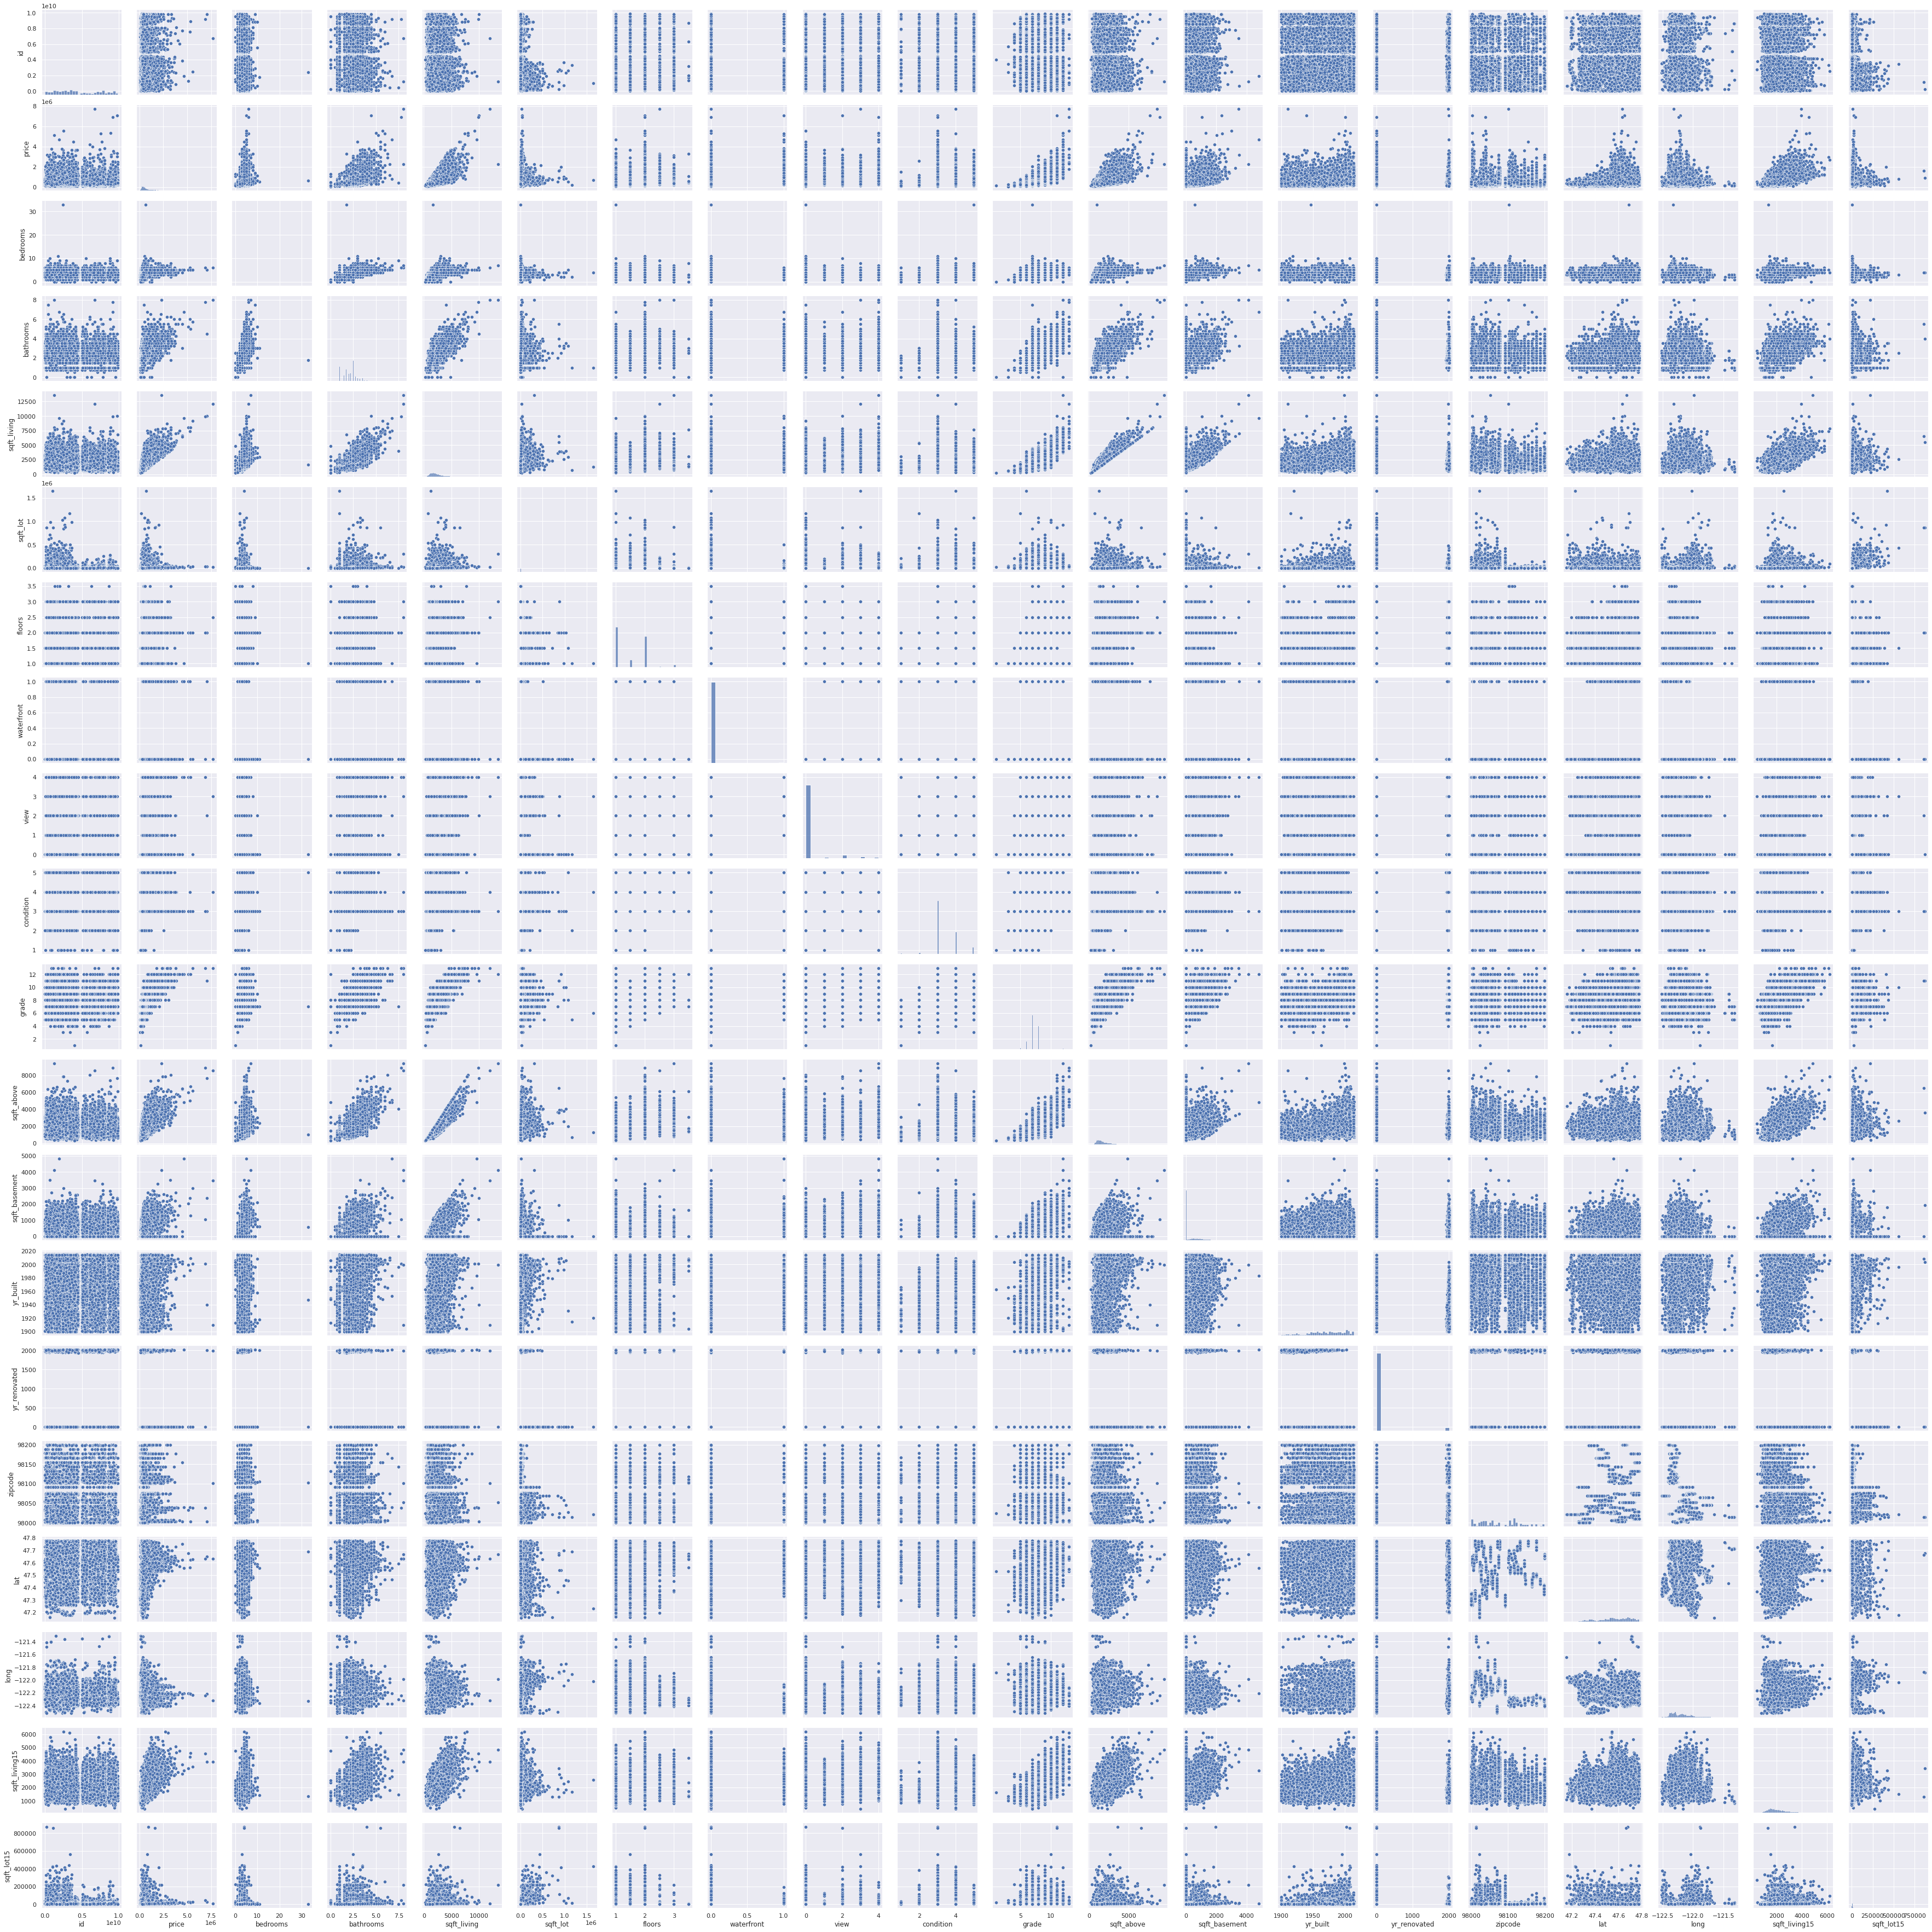

In [58]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df)
plt.show()


We can see that several columns have linear correlation

In [59]:
# # Calculating the pearson coefficient
# pearson_coeff = df["home_score"].corr(df["away_score"], method="pearson") 
# print(pearson_coeff)

# # Checking whether you have to define the pearson
# coeff = df["home_score"].corr(df["away_score"])
# print(coeff)

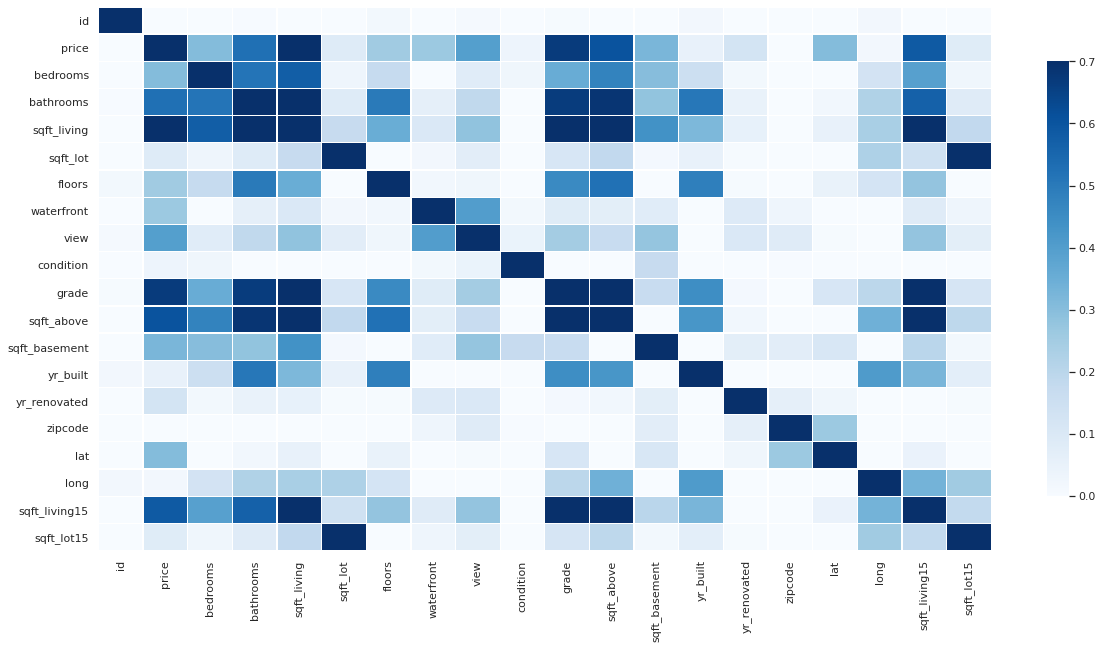

In [60]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues", vmin= 0.0, vmax=0.7,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns.set(rc={'figure.figsize':(7,7)})

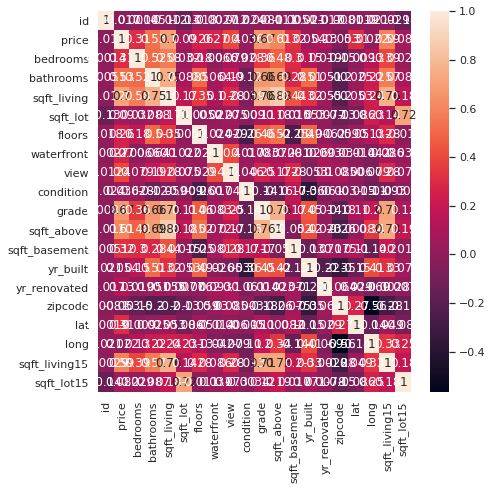

In [61]:
# heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

##7.Statistical analysis


We will start with multivariate statistics, which involves observation and analysis of more than one statistical outcomes variables at a time. Multi-variate analysis enables:

1. The exploration of data structures and patterns.
2. Probability computations of multi-dimensional regions.
3. The study and measurement of relationships.
4. Normal and general multivariate models and distribution theory.

We are doing the Supervised Learning Algorithm therefore I will perform the Linear Discriminant Analysis.

In [62]:

#Defining the X and y target variable
X = df.drop(['price'],axis=1)
y = df.price

In [63]:
lda_ = lda().fit(X,y)
lda_factors = lda_.transform(X)

In [64]:

#Printing the co-efficients weights of the respective columns
factors = pd.DataFrame(index = X.columns.values, data = lda_.coef_[0].T)
pd.options.display.float_format = '{:.8f}'.format
factors.sort_values(0, ascending=False)

0
long           19.85958416
floors          1.36362511
yr_built        0.14363983
zipcode         0.01310253
sqft_basement   0.00228739
sqft_living     0.00183350
sqft_above      0.00080998
sqft_lot15      0.00002103
id             -0.00000000
sqft_lot       -0.00001998
yr_renovated   -0.00054144
sqft_living15  -0.00102016
view           -0.77708794
condition      -2.56261586
bedrooms       -2.59720816
bathrooms      -6.32832848
grade         -11.08409846
waterfront    -12.13092444
lat           -44.02429032

In [65]:
#since we will be dropping some columns, I shall make a copy of our clean dataset as of now

ndf = df.copy()
ndf.head()

id           price  ...  sqft_living15  sqft_lot15
0  7129300520 221900.00000000  ...           1340        5650
1  6414100192 538000.00000000  ...           1690        7639
2  5631500400 180000.00000000  ...           2720        8062
3  2487200875 604000.00000000  ...           1360        5000
4  1954400510 510000.00000000  ...           1800        7503

[5 rows x 20 columns]

##Multiple Linear Regression

Multiple Linear Regression
This is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. This is an extension of linear regression that uses only one explanatory variable. There are assumptions taken during a multiple linear regression which are :

1. Linearity : There must be a linear relationship between the outcome variable and the independent variables.

2. No multicollinearity : Multiple regression assumes that the independent variables are not highly correlated with each other.

3. Homoscedasticity : This assumption states that the variance of error terms are similar across the values of the independent variables.

4. Normality : For any fixed value of X,Y is normally distributed.

We will do this checks for our multiple regression model and find out whether the assumptions have been fulfilled.

In [250]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [251]:
X = df[['bedrooms', 'sqft_living', 'sqft_lot', 'condition', 'yr_built']]
y = df.price
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:         bedrooms  sqft_living  sqft_lot  condition  yr_built
0             3         1180      5650          3      1955
1             3         2570      7242          3      1951
2             2          770     10000          3      1933
3             4         1960      5000          5      1965
4             3         1680      8080          3      1987
...         ...          ...       ...        ...       ...
21608         3         1530      1131          3      2009
21609         4         2310      5813          3      2014
21610         2         1020      1350          3      2009
21611         3         1600      2388          3      2004
21612         2         1020      1076          3      2008

[21610 rows x 5 columns]
the X array is:  0       221900.00
1       538000.00
2       180000.00
3       604000.00
4       510000.00
           ...   
21608   360000.00
21609   400000.00
21610   402101.00
21611   400000.00
21612   325000.00
Name: price, Length: 2

In [252]:
regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)

4537751.396961886
[-6.29769792e+04  3.44668230e+02 -3.92090244e-01  1.38743941e+04
 -2.30518897e+03]


In [253]:
#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

id  price  bedrooms  ...  long  sqft_living15  sqft_lot15
id             1.00  -0.02      0.00  ...  0.02          -0.00       -0.14
price         -0.02   1.00      0.31  ...  0.02           0.59        0.08
bedrooms       0.00   0.31      1.00  ...  0.13           0.39        0.03
bathrooms      0.01   0.53      0.52  ...  0.22           0.57        0.09
sqft_living   -0.01   0.70      0.58  ...  0.24           0.76        0.18
sqft_lot      -0.13   0.09      0.03  ...  0.23           0.14        0.72
floors         0.02   0.26      0.18  ...  0.13           0.28       -0.01
waterfront    -0.00   0.27     -0.01  ... -0.04           0.09        0.03
view           0.01   0.40      0.08  ... -0.08           0.28        0.07
condition     -0.02   0.04      0.03  ... -0.11          -0.09       -0.00
yr_built       0.02   0.05      0.15  ...  0.41           0.33        0.07
yr_renovated  -0.02   0.13      0.02  ... -0.07          -0.00        0.01
zipcode       -0.01  -0.05     -0.15  ... -0.56          -0.28       -0.15
lat           -0.00   0.31     -0.01  ... -0.14           0.05       -0.09
long           0.02   0.02      0.13  ...  1.00           0.33        0.25
sqft_living15 -0.00   0.59      0.39  ...  0.33           1.00        0.18
sqft_lot15    -0.14   0.08      0.03  ...  0.25           0.18        1.00

[17 rows x 17 columns]

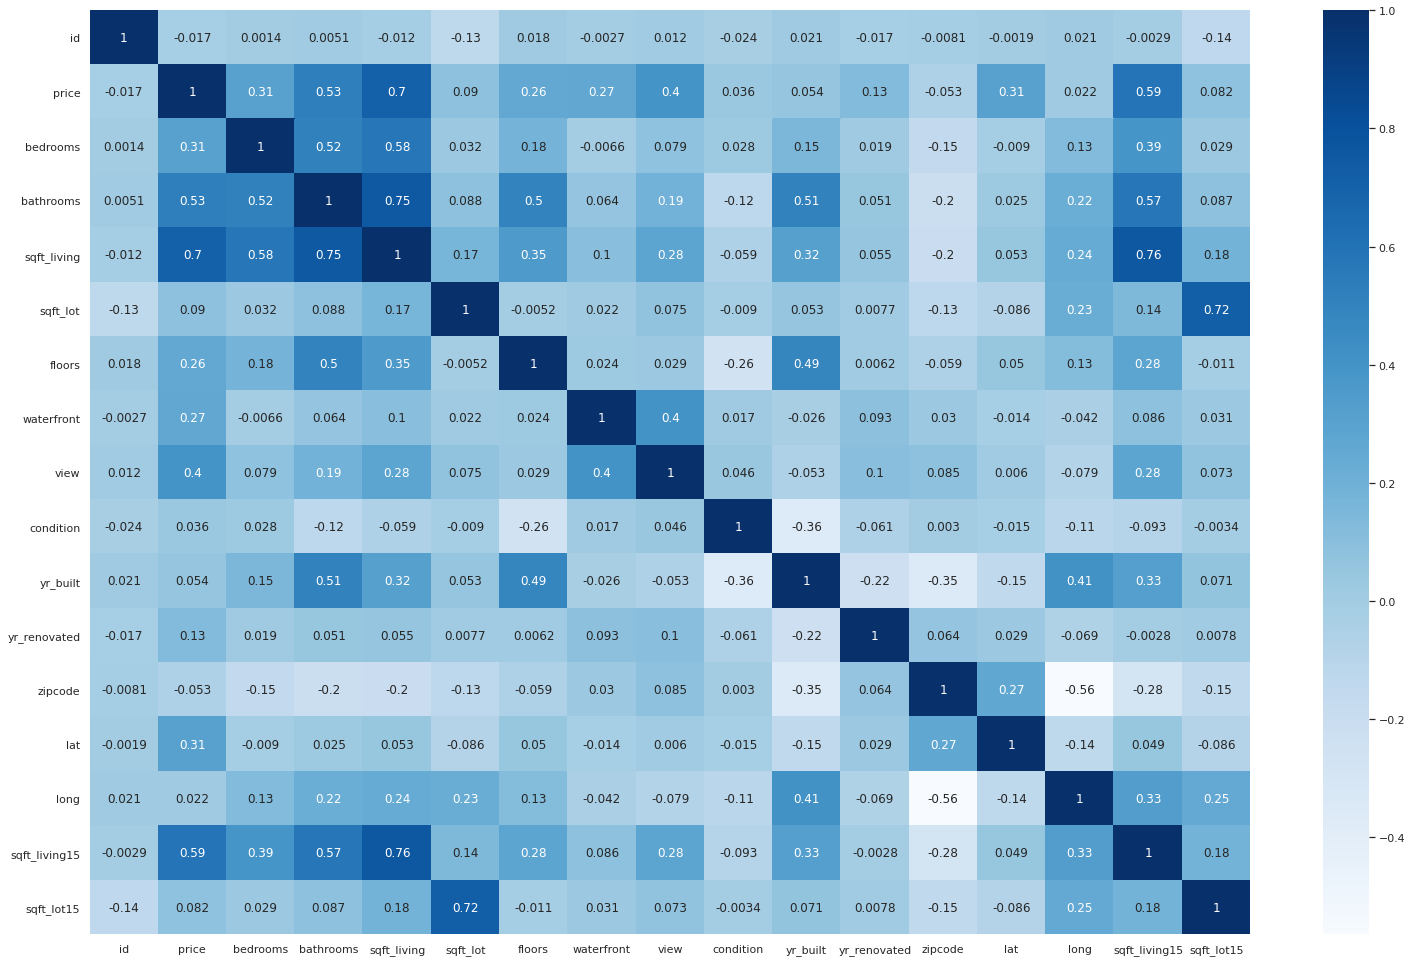

In [254]:
#A heatmap showing the correlations in our dataset 
plt.figure(figsize = (26,17))
sns.heatmap((correlations),annot=True, cmap="Blues");

The whiter areas show the areas that are highly correlated while the darker areas show the least correlated variables.


###Variance Inflation Factor

Generally a VIF Score of more than 4 signals a high multi-collinearity between one predictor and the other predictors in a model. High values signifies a difficulty to assess accurately the contribution of predictors to a model. Therefore, we shall drop columns which have a VIF greater than 4

In [255]:
#Checking the VIF
pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)

id  price  bedrooms  ...  long  sqft_living15  sqft_lot15
id             1.03   0.02      0.00  ... -0.07           0.00        0.11
price          0.02   3.03      0.36  ...  0.32          -0.42        0.10
bedrooms       0.00   0.36      1.67  ...  0.03           0.07        0.09
bathrooms     -0.01  -0.29     -0.48  ...  0.11           0.15        0.07
sqft_living   -0.01  -1.72     -1.05  ... -0.17          -1.65       -0.20
sqft_lot       0.08  -0.06      0.05  ... -0.15           0.14       -1.45
floors        -0.01  -0.19      0.07  ...  0.04           0.03        0.06
waterfront     0.01  -0.41      0.01  ... -0.03           0.11       -0.03
view          -0.04  -0.36      0.08  ...  0.10          -0.27       -0.02
condition      0.02  -0.14     -0.07  ...  0.00           0.11       -0.03
yr_built       0.01   0.46      0.25  ... -0.39          -0.16       -0.00
yr_renovated   0.02  -0.08      0.04  ... -0.06           0.09       -0.02
zipcode        0.00   0.28      0.11  ...  0.76           0.20       -0.01
lat            0.00  -0.76     -0.01  ... -0.12          -0.04        0.02
long          -0.07   0.32      0.03  ...  1.78          -0.36       -0.17
sqft_living15  0.00  -0.42      0.07  ... -0.36           2.69       -0.13
sqft_lot15     0.11   0.10      0.09  ... -0.17          -0.13        2.15

[17 rows x 17 columns]

In [256]:
#Removing the sqft_basement from the new dataset
revision = correlations.drop(['sqft_basement'],axis=1)
correlations = revision.corr()
correlations

KeyError: ignored

In [ ]:
#Removing the sqft_above
revision = correlations.drop(['sqft_above'],axis=1)


correlations = revision.corr()
correlations

In [ ]:
#Removing the grade from the new dataset
revision = correlations.drop(['grade'],axis=1)
correlations = revision.corr()


In [ ]:
#dropping the columns that caused high multicolinearity

df.drop([ 'sqft_above', 'grade','sqft_basement'], axis = 1, inplace = True)



In [ ]:
df.head()

In [ ]:
#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

In [ ]:
#Checking the VIF
pd.DataFrame(np.linalg.inv(correlations.values),index=correlations.index,columns=correlations.columns)

All VIF figures seem to be below 4 now. Lets procceed

It is observed that multi-collinearity levels were initialy extremely high. however on dropping some columns, the VIF decreases significantly.

The initial VIF scores show that multiple regression is not suited for this kind of data. Since one of the assumptions during a multiple regression model is that there should be no multi-collinearity.

However, with the dropped columns we have a chance of creating accurate predictive models

###Creating the model

In [257]:
X = df.drop(['price'],axis=1)
y = df.price
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:                 id  bedrooms  bathrooms  ...    long  sqft_living15  sqft_lot15
0      7129300520         3       1.00  ... -122.26           1340        5650
1      6414100192         3       2.25  ... -122.32           1690        7639
2      5631500400         2       1.00  ... -122.23           2720        8062
3      2487200875         4       3.00  ... -122.39           1360        5000
4      1954400510         3       2.00  ... -122.05           1800        7503
...           ...       ...        ...  ...     ...            ...         ...
21608   263000018         3       2.50  ... -122.35           1530        1509
21609  6600060120         4       2.50  ... -122.36           1830        7200
21610  1523300141         2       0.75  ... -122.30           1020        2007
21611   291310100         3       2.50  ... -122.07           1410        1287
21612  1523300157         2       0.75  ... -122.30           1020        1357

[21610 rows x 16 columns]
the X ar

In [258]:

#Splitting the train and test values in our dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

#Fitting the data in a linear regression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
#Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()
regressor.fit(X_train, y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [260]:
#Grid Search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
parameters = dict(alpha = alpha)
grid_search = GridSearchCV(estimator=ridge, param_grid=parameters,  verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished


{'alpha': 10}

In [261]:
#Lets see how the different alpha values compare to each other

for i in range(len(parameters['alpha'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

parameters {'alpha': 0.001}
mean Test scores: 0.6659355128368113
Rank: 5
parameters {'alpha': 0.01}
mean Test scores: 0.6659355167064944
Rank: 4
parameters {'alpha': 0.1}
mean Test scores: 0.6659355553439271
Rank: 3
parameters {'alpha': 1}
mean Test scores: 0.6659359357824642
Rank: 2
parameters {'alpha': 10}
mean Test scores: 0.6659391506361472
Rank: 1
parameters {'alpha': 100}
mean Test scores: 0.6659161517762804
Rank: 6
parameters {'alpha': 1000}
mean Test scores: 0.6624785625888043
Rank: 7


In [262]:
#Printing out the columns and the respective coefficients.
coef_dict_baseline = {}
for coef,feat in zip(regressor.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 42535.79590436025,
 'bedrooms': -46576.256854360065,
 'condition': 26461.271907695107,
 'floors': 44072.70490047032,
 'id': -1.0009536060802277e-06,
 'lat': 673117.4071991716,
 'long': -270535.31788112596,
 'sqft_living': 227.6465308409831,
 'sqft_living15': 73.12229868793767,
 'sqft_lot': 0.1687691765910131,
 'sqft_lot15': -0.4699548343778588,
 'view': 58589.0940834948,
 'waterfront': 546632.0983380455,
 'yr_built': -1814.9849190795915,
 'yr_renovated': 26.02020370771463,
 'zipcode': -642.8718959414966}

In [263]:
#Predicting the prices using our using our test data
y_pred = regressor.predict(X_test)

In [264]:
#Multiple Linear Regression Model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 924011.628720953
Mean Squared Error: 1364513768301.345
Root Mean Squared Error: 1168124.038063315


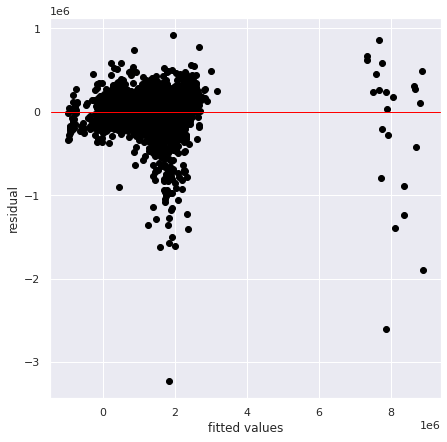

In [265]:
#Plotting the residuals for our linear regression model.


plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color='red', linewidth=1)
plt.show()

In [266]:
#Calculating the bartlett test using the chi-sqaure disribution.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

inf
The variances are homogeneous!


The variances in the dataset seem to be equally distributed. However our RMSE score is extremely high and therefore this method should not be used for prediction.


##Quantile Regression

This is an extension of the linear regression used when the conditions of the linear regression are not met such as the homoscedasticity. Our multiple regression met that assumption.
Assumptions:
1. the normal regression assumptions of linearity and additivity (unless you add more terms to the model)
2. independence of observations
3. very large sample size, as quantile regression is not very efficient
4. Y is very continuous; quantile regression doesn't work well when there are many ties at one or more values of Y

since our model is heavily multi-collinear this model might not be a perfect fit for our data making it a limitation to work with.

In [85]:

#defining the predictor variables and the target variable
X = df.drop(['price'],axis=1).values
y = df['price']
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:  [[ 7.12930052e+09  3.00000000e+00  1.00000000e+00 ... -1.22257000e+02
   1.34000000e+03  5.65000000e+03]
 [ 6.41410019e+09  3.00000000e+00  2.25000000e+00 ... -1.22319000e+02
   1.69000000e+03  7.63900000e+03]
 [ 5.63150040e+09  2.00000000e+00  1.00000000e+00 ... -1.22233000e+02
   2.72000000e+03  8.06200000e+03]
 ...
 [ 1.52330014e+09  2.00000000e+00  7.50000000e-01 ... -1.22299000e+02
   1.02000000e+03  2.00700000e+03]
 [ 2.91310100e+08  3.00000000e+00  2.50000000e+00 ... -1.22069000e+02
   1.41000000e+03  1.28700000e+03]
 [ 1.52330016e+09  2.00000000e+00  7.50000000e-01 ... -1.22299000e+02
   1.02000000e+03  1.35700000e+03]]
the X array is:  0       221900.00000000
1       538000.00000000
2       180000.00000000
3       604000.00000000
4       510000.00000000
              ...      
21608   360000.00000000
21609   400000.00000000
21610   402101.00000000
21611   400000.00000000
21612   325000.00000000
Name: price, Length: 21610, dtype: float64


In [86]:
#Splitting our data and using 70% for training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)


In [87]:
#Dividing our dataset into 3 different quantiles

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 

   mod = quant
   mod.QuantReg(y_train, X_train).fit(q=q)
   
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs


In [88]:
 Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])


AttributeError: ignored

In [ ]:
 # Get the R-squared for 50% percentile
q = 0.5
y_test_pred1 = quant.QuantReg(y_train, X_train).fit(q=0.25).predict(X_test)
y_test_pred2 = quant.QuantReg(y_train, X_train).fit(q=0.5).predict(X_test)
y_test_pred3 = quant.QuantReg(y_train, X_train).fit(q=0.75).predict(X_test)
r2 = metrics.r2_score(y_test,y_test_pred)

In [ ]:
#Adding an extra array to our predictor variables to be able to perfrom a mathematical operation in the quantile regression
#Defining the mean and standard deviation of our extra array to be a normal distribution of mean 0 and standard deviation
#of 0.001 to reduce any manipulation of our data.
mu ,sigma = 0, 0.001
#Generating a normal random variables with the same shape as our dataset
noise = np.random.normal(mu, sigma , [21610,19])

In [ ]:
X.shape

In [ ]:
#Adding the noise to our predictor variables
X = X + noise

In [ ]:
#Performing a qauntile regression of the 50th percentile.
import statsmodels.formula.api as smf 
mod =smf.quantreg('y ~ X',df)
res = mod.fit(q=.5)

print(res.summary())

##Ridge regression


The assumptions of ridge regression are the same as that of linear regression: 

1. linearity
2. constant variance
3. independence 

However, as ridge regression does not provide confidence limits, the distribution of errors to be normal need not be assumed.

In [125]:
#I defined the predictor and target variables as X and y respectively
X = df.drop(['price'],axis=1)
y = df['price']
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:                 id  bedrooms  bathrooms  ...          long  sqft_living15  sqft_lot15
0      7129300520         3 1.00000000  ... -122.25700000           1340        5650
1      6414100192         3 2.25000000  ... -122.31900000           1690        7639
2      5631500400         2 1.00000000  ... -122.23300000           2720        8062
3      2487200875         4 3.00000000  ... -122.39300000           1360        5000
4      1954400510         3 2.00000000  ... -122.04500000           1800        7503
...           ...       ...        ...  ...           ...            ...         ...
21608   263000018         3 2.50000000  ... -122.34600000           1530        1509
21609  6600060120         4 2.50000000  ... -122.36200000           1830        7200
21610  1523300141         2 0.75000000  ... -122.29900000           1020        2007
21611   291310100         3 2.50000000  ... -122.06900000           1410        1287
21612  1523300157         2 0.75000000  ... -122

In [126]:
ridge = Ridge(normalize=True)
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [127]:

#Getting the mean sqaured error of the baseline model
from sklearn.metrics import mean_squared_error
baseline_model = (np.sqrt(mean_squared_error(y_true = y, y_pred = ridge.predict(X))))
baseline_model

240220.95442035908

###Hyperparameter Tuning

In [128]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [129]:
#Standardizing our predictor variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [130]:
#I defined the lambda variable as alpha and grid searched between the -5 and 8 values.


ridge = Ridge(normalize=True)
alpha = np.arange(-5,8,1)
parameters = dict(alpha = alpha)
search = GridSearchCV(Ridge(normalize=True),parameters,cv = 10, return_train_score= True)
search.fit(X_train, y_train)
search.best_params_

{'alpha': 0}

In [131]:
#Lets see how the different alpha values compare to each other

for i in range(len(parameters['alpha'])):
  print('parameters', search.cv_results_['params'][i])
  print('mean Test scores:', search.cv_results_['mean_test_score'][i])
  print('Rank:', search.cv_results_['rank_test_score'][i])

parameters {'alpha': -5}
mean Test scores: -4.817162658842456
Rank: 9
parameters {'alpha': -4}
mean Test scores: -89.77743242151685
Rank: 11
parameters {'alpha': -3}
mean Test scores: -5.6692322213735435
Rank: 10
parameters {'alpha': -2}
mean Test scores: -98.76575531276424
Rank: 12
parameters {'alpha': -1}
mean Test scores: -4936.104859552245
Rank: 13
parameters {'alpha': 0}
mean Test scores: 0.6665608563350489
Rank: 1
parameters {'alpha': 1}
mean Test scores: 0.5707099700077274
Rank: 2
parameters {'alpha': 2}
mean Test scores: 0.48886750348897684
Rank: 3
parameters {'alpha': 3}
mean Test scores: 0.4261778900467371
Rank: 4
parameters {'alpha': 4}
mean Test scores: 0.37731064825438965
Rank: 5
parameters {'alpha': 5}
mean Test scores: 0.3383249319925874
Rank: 6
parameters {'alpha': 6}
mean Test scores: 0.3065577079314436
Rank: 7
parameters {'alpha': 7}
mean Test scores: 0.2801975458804604
Rank: 8


In [132]:
#I created a second model with the alpha value at 0.01 to find the best score
ridge = Ridge(alpha = search.best_params_['alpha']).fit(X_train, y_train)
ridge
print('Training score:', ridge.score(X_train, y_train))
y_pred = ridge.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values
# 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff

Training score: 0.6680081002535119
Test score: 0.6736186959230259


Actual        Predicted
21202 450800.00000000  521238.44808841
8457  350000.00000000  370523.19241489
1611  378000.00000000  199828.83765767
9736  292000.00000000  320869.05492235
11752 302500.00000000  337153.33695677
...               ...              ...
2747  726000.00000000  684491.14266245
20334 425000.00000000  375874.63460772
20592 969990.00000000 1031498.50718924
2333  555000.00000000  998905.96513027
17148 204250.00000000  352673.84801416

[5403 rows x 2 columns]

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 133405.96292910518
Mean Squared Error: 44385249451.12692
Root Mean Squared Error: 210678.07064601412


The RMSE is way too high. Probably due to excessive multi colinearity, this model does not work and the predictions cannot be trusted.

##Lasso Regression

In [134]:
#Defining our dependent and independent variables
X = df.drop(['price'],axis=1)
y = df['price']
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:                 id  bedrooms  bathrooms  ...          long  sqft_living15  sqft_lot15
0      7129300520         3 1.00000000  ... -122.25700000           1340        5650
1      6414100192         3 2.25000000  ... -122.31900000           1690        7639
2      5631500400         2 1.00000000  ... -122.23300000           2720        8062
3      2487200875         4 3.00000000  ... -122.39300000           1360        5000
4      1954400510         3 2.00000000  ... -122.04500000           1800        7503
...           ...       ...        ...  ...           ...            ...         ...
21608   263000018         3 2.50000000  ... -122.34600000           1530        1509
21609  6600060120         4 2.50000000  ... -122.36200000           1830        7200
21610  1523300141         2 0.75000000  ... -122.29900000           1020        2007
21611   291310100         3 2.50000000  ... -122.06900000           1410        1287
21612  1523300157         2 0.75000000  ... -122

In [135]:
# Split the dataset into train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [136]:
#Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
regressor = LinearRegression()
regressor.fit(X_train, y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [137]:
#Grid Search
alpha = np.arange(0.1,1,0.1)
#[0.1, 0.4, 0.5, 0.7, 0.9, 1.0]
parameters = dict(alpha = alpha)
grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score= True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.9}

In [138]:
#Lets see how the different alpha values compare to each other

for i in range(len(parameters['alpha'])):
  print('parameters', grid_search.cv_results_['params'][i])
  print('mean Test scores:', grid_search.cv_results_['mean_test_score'][i])
  print('Rank:', grid_search.cv_results_['rank_test_score'][i])

parameters {'alpha': 0.1}
mean Test scores: 0.664834977649618
Rank: 9
parameters {'alpha': 0.2}
mean Test scores: 0.6648349794052479
Rank: 8
parameters {'alpha': 0.30000000000000004}
mean Test scores: 0.6648349812403146
Rank: 7
parameters {'alpha': 0.4}
mean Test scores: 0.6648349830790977
Rank: 6
parameters {'alpha': 0.5}
mean Test scores: 0.6648349850569163
Rank: 5
parameters {'alpha': 0.6}
mean Test scores: 0.6648349863677009
Rank: 4
parameters {'alpha': 0.7000000000000001}
mean Test scores: 0.664834988858289
Rank: 3
parameters {'alpha': 0.8}
mean Test scores: 0.6648349904694989
Rank: 2
parameters {'alpha': 0.9}
mean Test scores: 0.6648349934362983
Rank: 1


We can see that the difference in performance of the different alpha values is insignificant

In [139]:
#Lasso model

lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(X_train, y_train)
lasso_model
print('Training score:', lasso_model.score(X_train, y_train))
y_pred = lasso_model.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# Making Predictions

# To compare the actual output values for X_test with the predicted values
# 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff


Training score: 0.6682771845619375
Test score: 0.6742174452009764


Actual       Predicted
9790   680200.00000000 644319.06117230
10280  550000.00000000 522871.34804528
21572  230000.00000000 187956.54757866
20060  379950.00000000 489946.99244230
21204 1060000.00000000 696698.04157784
...                ...             ...
17762  300000.00000000 223007.09501535
13211  395000.00000000 562369.41598782
8108   395000.00000000 571399.08292551
19728  489000.00000000 479382.00636155
16123  382500.00000000 201982.79331971

[4322 rows x 2 columns]

In [140]:
#Lasso model
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 133940.25236562372
Mean Squared Error: 42814404634.92579
Root Mean Squared Error: 206916.4194425512


In [141]:
#Printing out the columns and the respective coefficients.
coef_dict_baseline = {}
for coef,feat in zip(lasso_model.coef_,X.columns):
  coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 33810.59868118477,
 'bedrooms': -44900.80979616276,
 'condition': 18057.83245359827,
 'floors': 22641.91189847447,
 'id': -2164.504636620131,
 'lat': 92852.89918550308,
 'long': -39306.175325267715,
 'sqft_living': 207838.68161171224,
 'sqft_living15': 53160.32061403349,
 'sqft_lot': 9521.995253721907,
 'sqft_lot15': -13680.945498839084,
 'view': 43592.85078731871,
 'waterfront': 52917.93486599724,
 'yr_built': -53255.94547516303,
 'yr_renovated': 11038.584872775391,
 'zipcode': -34004.22377278224}

The Lasso regression is advantageous since it does feature selection.

##Elastic Net Regression

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds.

A convex combination of Ridge and Lasso.

In [144]:
#Defining our dependent and independent variables
X = df.drop(['price'],axis=1)
y = df['price']
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:                 id  bedrooms  bathrooms  ...          long  sqft_living15  sqft_lot15
0      7129300520         3 1.00000000  ... -122.25700000           1340        5650
1      6414100192         3 2.25000000  ... -122.31900000           1690        7639
2      5631500400         2 1.00000000  ... -122.23300000           2720        8062
3      2487200875         4 3.00000000  ... -122.39300000           1360        5000
4      1954400510         3 2.00000000  ... -122.04500000           1800        7503
...           ...       ...        ...  ...           ...            ...         ...
21608   263000018         3 2.50000000  ... -122.34600000           1530        1509
21609  6600060120         4 2.50000000  ... -122.36200000           1830        7200
21610  1523300141         2 0.75000000  ... -122.29900000           1020        2007
21611   291310100         3 2.50000000  ... -122.06900000           1410        1287
21612  1523300157         2 0.75000000  ... -122

In [145]:
elastic = ElasticNet(normalize=True)
elastic.fit(X,y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

###Hyper Parameter Tuning

In [146]:
#Splitting our data into a train and test model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [147]:
#Standardizing our predictor variables
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [148]:

# Normalising Elastic Net Regression and creating our GridSearch

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.arange(-5,2,1),'l1_ratio':[.001, 0.1, .2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [149]:
search.fit(X_train, y_train)
search.best_params_

{'alpha': 0, 'l1_ratio': 0.001}

In [150]:
#Elastic Net Regression
# Evaluating the Algorithm
# ---
# 
print('Training score:', search.score(X_train, y_train))
y_pred = search.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

Training score: -44690796086.584694
Test score: 0.6736186959230261


In [151]:
# Making Predictions

# To compare the actual output values for X_test with the predicted values
# 
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dff


Actual        Predicted
21202 450800.00000000  521238.44808842
8457  350000.00000000  370523.19241489
1611  378000.00000000  199828.83765767
9736  292000.00000000  320869.05492236
11752 302500.00000000  337153.33695677
...               ...              ...
2747  726000.00000000  684491.14266245
20334 425000.00000000  375874.63460772
20592 969990.00000000 1031498.50718924
2333  555000.00000000  998905.96513027
17148 204250.00000000  352673.84801416

[5403 rows x 2 columns]

In [152]:
#Elastic Net Regression
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 133405.96292910533
Mean Squared Error: 44385249451.12689
Root Mean Squared Error: 210678.07064601406


The RMSE is way too high. This model does not work and the predictions cannot be trusted.

##Conclusion



After attempting to run the dataset with the different models, I was consistently coming up with extremely high RMSE values. However, I attempted to review the code, dropping columns and there was no improvement on the values

This could be a point for improvement for other collaborators.

Follow up questions

It would be interesting to find out whether there are other factors that affect the price for the houses beside these given in the dataset.

It is highly recommended that futher research is done on the factors affecting prices for houses which are not only the house feature/condition but also other factor like economical.

Important environmental conditions such as access to social amenities also affect the prices of houses as well as infrastructure

I also had a challenge fitting the quantile regression model on this dataset.